In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
df = pd.read_csv('Data/final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
pd.set_option('display.max_columns', 500)
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [4]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [5]:
df.tail()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.0,0.0,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.0,0.0,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.0,0.0,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.0,0.0,865,0,0,0,50000,50000,4,0
10753,/alexander-badolato/profil/spieler/957230,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.000000,18.0,21,0.000000,0.000000,0.086042,0.0,0.000000,0.0,0.0,1046,0,0,0,25000,25000,4,0


In [6]:
df.shape

(10754, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
height,10754.0,1.812404e+02,6.969818e+00,156.0,176.000000,1.812404e+02,1.860000e+02,2.060000e+02
age,10754.0,2.604190e+01,4.777629e+00,15.0,22.000000,2.600000e+01,2.900000e+01,4.300000e+01
appearance,10754.0,3.640701e+01,2.652654e+01,0.0,12.000000,3.500000e+01,5.900000e+01,1.070000e+02
goals,10754.0,1.255543e-01,2.355851e-01,0.0,0.000000,4.596918e-02,1.722625e-01,1.125000e+01
assists,10754.0,8.697765e-02,1.433513e-01,0.0,0.000000,4.077323e-02,1.331361e-01,4.000000e+00
yellow cards,10754.0,1.897572e-01,4.323879e-01,0.0,0.053191,1.502504e-01,2.482759e-01,3.000000e+01
second yellow cards,10754.0,4.665667e-03,2.523200e-02,0.0,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
red cards,10754.0,6.826070e-03,8.114266e-02,0.0,0.000000,0.000000e+00,0.000000e+00,6.923077e+00
goals conceded,10754.0,1.316555e-01,4.423355e-01,0.0,0.000000,0.000000e+00,0.000000e+00,9.000000e+00
clean sheets,10754.0,4.488090e-02,9.244373e-01,0.0,0.000000,0.000000e+00,0.000000e+00,9.000000e+01


In [9]:
df.describe(include='object')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/alexander-badolato/profil/spieler/957230,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [10]:
# The dataset is sourced from Transfermarkt, a reputable platform known for accurate football statistics and player valuations, widely used by analysts and scouts. 
# Data was scraped on June 10, 2023, using Selenium and BeautifulSoup, ensuring up-to-date and reliable information.
# Performance metrics were normalized to a per 90 minutes basis for consistency. Additionally, key variables were selected based on strong correlations with 'current_value,' improving model efficiency and reducing noise. 
# These factors make Transfermarkt a trustworthy and statistically sound source for analysis.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [11]:
# The dataset covers two seasons (2021-2022 and 2022-2023), ensuring a recent and relevant timeframe for predicting player transfer values. 
# It includes professional statistics such as goals, assists, injuries, and career awards, providing a comprehensive view of player performance.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [12]:
# Since the dataset comes from a single source (Transfermarkt), there are no conflicts between multiple data sources. 
# Key statistics, including per 90-minute metrics, were applied consistently across all players, ensuring uniformity. 
# The data remains reliable for predictive modeling.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [13]:
# The dataset is highly relevant for predicting player transfer values, as it includes key factors like player performance (goals, assists), career awards, and injuries across top-tier leagues worldwide. 
# The sample aligns with the objective of analyzing transfer market trends, ensuring meaningful insights.
# Additionally, irrelevant variables will be removed to enhance model efficiency. 
# Like, the 'player' variable, which only contains the URL of the player’s Transfermarkt page, will be dropped as it is not useful for the analysis.

In [14]:
# Go to delete irrelevant columns

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [15]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [16]:
df[df.duplicated(['name', 'position'], keep=False)].sort_values(by='name').head(10)
# We found instances where the same player appears multiple times but with different teams, indicating that they transferred during the dataset's timeframe (2021-2022 and 2022-2023 seasons). 
# This is expected, as the dataset tracks player movements and updates their statistics based on the team they played for.
# However, no exact duplicate rows (where all values are identical) were found, confirming that each entry represents a unique player-team-season combination. 
# This ensures that the dataset accurately reflects player transfers without redundancy.

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
9256,/abdullah-al-yousef/profil/spieler/180926,Al-Batin FC,Abdullah Al-Yousef,Defender Left-Back,175.0,25.0,35,0.000000,0.039147,0.195737,0.000000,0.000000,0.0,0.0,2299,0,0,0,125000,125000,2,1
9295,/abdullah-al-yousef/profil/spieler/478535,Al-Adalah FC,Abdullah Al-Yousef,Defender Left-Back,174.0,33.0,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,176,0,0,0,25000,125000,2,1
4652,/alan-rodriguez/profil/spieler/353263,Deportivo Toluca,Alan Rodríguez,midfield-CentralMidfield,180.0,27.0,47,0.159198,0.053066,0.371462,0.053066,0.000000,0.0,0.0,1696,0,0,0,300000,300000,3,0
8112,/alan-rodriguez/profil/spieler/465817,AA Argentinos Juniors,Alan Rodríguez,midfield-CentralMidfield,170.0,23.0,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,836,0,0,0,1300000,1300000,3,0
3881,/andre-silva/profil/spieler/565232,Vitória Guimarães SC,André Silva,Attack Centre-Forward,181.0,25.0,66,0.280592,0.122759,0.175370,0.017537,0.017537,0.0,0.0,5132,74,10,0,2000000,2000000,4,0
1052,/andre-silva/profil/spieler/198008,RB Leipzig,André Silva,Attack Centre-Forward,185.0,27.0,95,0.403379,0.263748,0.077573,0.000000,0.000000,0.0,0.0,5801,221,15,4,20000000,45000000,4,0
5170,/claudinho/profil/spieler/403315,Zenit St. Petersburg,Claudinho,midfield-AttackingMidfield,170.0,26.0,61,0.289451,0.328045,0.135077,0.019297,0.019297,0.0,0.0,4664,29,5,8,20000000,20000000,3,0
3496,/claudinho/profil/spieler/792249,Cruzeiro Esporte Clube,Claudinho,midfield-AttackingMidfield,167.0,22.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,67,0,0,0,400000,400000,3,0
4171,/edutm/profil/spieler/841731,GD Chaves,Edu,Defender Centre-Back,185.0,21.0,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,119,0,0,0,200000,200000,2,0
3510,/edutm/profil/spieler/371250,Goiás Esporte Clube,Edu,Defender Centre-Back,185.0,22.0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,92,0,0,0,500000,500000,2,0


In [17]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [18]:
#Display number missing values per column
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [19]:
# Since there were no null values, we manually checked for incorrect entries: 
# '-', '.', or ' ' in categorical columns and negative values in numerical columns.

In [20]:
categorical_columns = ['team', 'name', 'position']

incorrect_values = {}

for col in categorical_columns:
    incorrect_entries = df[df[col].isin(['-', '.', ' '])]
    if not incorrect_entries.empty:
        incorrect_values[col] = incorrect_entries[col].unique()

if incorrect_values:
    for col, values in incorrect_values.items():
        print(f"Incorrect values found in column '{col}': {values}")
else:
    print("No incorrectly entered values found in categorical columns.")


No incorrectly entered values found in categorical columns.


In [21]:
numerical_columns = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 
    'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 
    'minutes played', 'days_injured', 'games_injured', 'award', 
    'current_value', 'highest_value', 'position_encoded', 'winger'
]

negative_values = {}

for col in numerical_columns:
    negative_entries = df[df[col] < 0]
    if not negative_entries.empty:
        negative_values[col] = negative_entries[col].unique()

if negative_values:
    for col, values in negative_values.items():
        print(f"Negative values found in column '{col}': {values}")
else:
    print("No negative values found in numerical columns.")


No negative values found in numerical columns.


In [22]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [23]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [28]:
# check columns types 
df.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
position_label          object
winger_label            object
dtype: object

In [29]:
# go to clean them 

In [30]:
# Added two more columns to explain the position and winger label 

In [31]:
df.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_label,winger_label
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0,Goalkeeper,Not Winger
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0,Goalkeeper,Not Winger
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0,Goalkeeper,Not Winger
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0,Defender,Not Winger
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0,Defender,Not Winger


In [32]:
# Splitting the dataset by position to handle outliers separately.
# Some values that are extreme for one position may be normal for another.
# - Example: A high number of goals is expected for forwards but unrealistic for goalkeepers.
# - Example: Clean sheets and goals conceded are key for goalkeepers but irrelevant for other positions.
# By creating separate DataFrames, we can apply position-specific outlier detection 
# and preprocessing to improve model accuracy.

In [33]:
# Create separate DataFrames for each position
df_defenders = df[df['position_label'] == 'Defender'].copy()
df_midfielders = df[df['position_label'] == 'Midfielder'].copy()
df_forwards = df[df['position_label'] == 'Forward'].copy()
df_goalkeepers = df[df['position_label'] == 'Goalkeeper'].copy()

In [34]:
df_defenders.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_label,winger_label
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.0,0.0,0.0,6408,175,22,9,50000000,50000000,2,0,Defender,Not Winger
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.0,0.0,0.0,5031,238,51,21,40000000,80000000,2,0,Defender,Not Winger
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,0.0,0.0,4762,148,27,1,25000000,70000000,2,0,Defender,Not Winger
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,0.0,0.0,0.0,5471,95,19,10,15000000,35000000,2,0,Defender,Not Winger
7,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.0000,0.0,0.0,0.0,416,932,169,7,2000000,20000000,2,0,Defender,Not Winger


In [35]:
df_midfielders.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_label,winger_label
14,Manchester United,Casemiro,midfield-DefensiveMidfield,185.0,31.0,101,0.090817,0.124874,0.329213,0.0,0.022704,0.0,0.0,7928,174,31,23,50000000,80000000,3,0,Midfielder,Not Winger
15,Manchester United,Scott McTominay,midfield-DefensiveMidfield,191.0,26.0,76,0.096010,0.038404,0.384041,0.0,0.000000,0.0,0.0,4687,249,53,2,25000000,35000000,3,0,Midfielder,Not Winger
16,Manchester United,Christian Eriksen,midfield-CentralMidfield,182.0,31.0,55,0.067214,0.313667,0.089619,0.0,0.000000,0.0,0.0,4017,0,0,10,25000000,100000000,3,0,Midfielder,Not Winger
17,Manchester United,Marcel Sabitzer,midfield-CentralMidfield,177.0,29.0,74,0.144046,0.086428,0.230474,0.0,0.000000,0.0,0.0,3124,280,35,8,20000000,42000000,3,0,Midfielder,Not Winger
18,Manchester United,Fred,midfield-CentralMidfield,169.0,30.0,92,0.184843,0.221811,0.332717,0.0,0.000000,0.0,0.0,4869,45,10,11,20000000,50000000,3,0,Midfielder,Not Winger


In [36]:
df_forwards.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_label,winger_label
23,Manchester United,Marcus Rashford,Attack-LeftWinger,185.0,25.0,88,0.528790,0.196408,0.075541,0.000000,0.000000,0.0,0.0,5957,319,35,9,80000000,85000000,4,1,Forward,Winger
24,Manchester United,Jadon Sancho,Attack-LeftWinger,180.0,23.0,79,0.219780,0.109890,0.000000,0.000000,0.000000,0.0,0.0,4914,173,32,5,55000000,130000000,4,1,Forward,Winger
25,Manchester United,Anthony Elanga,Attack-LeftWinger,178.0,21.0,63,0.236220,0.206693,0.029528,0.000000,0.029528,0.0,0.0,3048,0,0,1,25000000,25000000,4,1,Forward,Winger
26,Manchester United,Alejandro Garnacho,Attack-LeftWinger,180.0,18.0,72,0.525730,0.300417,0.225313,0.025035,0.000000,0.0,0.0,3595,50,11,2,25000000,25000000,4,1,Forward,Winger
27,Manchester United,Antony,Attack-RightWinger,172.0,23.0,80,0.335252,0.228581,0.182865,0.015239,0.000000,0.0,0.0,5906,196,22,5,70000000,75000000,4,1,Forward,Winger


In [37]:
df_goalkeepers.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_label,winger_label
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0,Goalkeeper,Not Winger
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0,Goalkeeper,Not Winger
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0,Goalkeeper,Not Winger
32,West Ham United,Alphonse Areola,Goalkeeper,195.0,30.0,41,0.0,0.0,0.000000,0.0,0.0,0.898502,0.449251,3606,34,4,16,8000000,17500000,1,0,Goalkeeper,Not Winger
33,West Ham United,Lukasz Fabianski,Goalkeeper,190.0,38.0,75,0.0,0.0,0.040767,0.0,0.0,1.331723,0.271780,6623,554,99,4,1000000,9000000,1,0,Goalkeeper,Not Winger


In [38]:
print(f"Defenders dataset: {df_defenders.shape[0]} players")
print(f"Midfielders dataset: {df_midfielders.shape[0]} players")
print(f"Forwards dataset: {df_forwards.shape[0]} players")
print(f"Goalkeepers dataset: {df_goalkeepers.shape[0]} players")

Defenders dataset: 3528 players
Midfielders dataset: 3095 players
Forwards dataset: 2902 players
Goalkeepers dataset: 1229 players


In [39]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [42]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [43]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [44]:
# go to delete ouliers

In [45]:
# After spllitting the data frame based on position this is better since the model can learn the factors that effects each position independantly.
# Now check for the outliers in each position data frame

In [122]:
df_goalkeepers.loc[df_goalkeepers['days_injured'] > 1000, 'days_injured'] = 1000
df_goalkeepers.loc[df_goalkeepers['games_injured'] > 120, 'games_injured'] = 120

In [47]:
df_goalkeepers.describe().T

,count,mean,std,min,25%,50%,75%,max
height,1229.0,1.888275e+02,4.733452e+00,172.0,186.000000,189.000000,1.920000e+02,2.060000e+02
age,1229.0,2.746549e+01,5.618108e+00,15.0,23.000000,27.000000,3.200000e+01,4.200000e+01
appearance,1229.0,2.427014e+01,2.476529e+01,0.0,3.000000,16.000000,4.000000e+01,1.050000e+02
goals,1229.0,4.109241e-04,5.306104e-03,0.0,0.000000,0.000000,0.000000e+00,1.034483e-01
assists,1229.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
yellow cards,1229.0,5.119906e-02,9.410439e-02,0.0,0.000000,0.017496,7.566204e-02,1.000000e+00
second yellow cards,1229.0,9.644682e-04,1.194587e-02,0.0,0.000000,0.000000,0.000000e+00,2.556818e-01
red cards,1229.0,5.522664e-03,4.792428e-02,0.0,0.000000,0.000000,0.000000e+00,1.000000e+00
goals conceded,1229.0,1.152012e+00,7.327244e-01,0.0,0.842434,1.214029,1.534091e+00,9.000000e+00
clean sheets,1229.0,3.927170e-01,2.710437e+00,0.0,0.111111,0.255102,3.630659e-01,9.000000e+01


In [48]:
# These players are likly inactive since the have no current values and they have 0 minutes played
df_goalkeepers[(df_goalkeepers['current_value'] == 0) & 
                              (df_goalkeepers['minutes played'] == 0)]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_label,winger_label
1032,RB Leipzig,Oskar Preil,Goalkeeper,187.000000,19.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,Goalkeeper,Not Winger
8444,FC Tokyo,Wataru Goto,Goalkeeper,191.000000,17.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,Goalkeeper,Not Winger
8621,Sagan Tosu,Bong-jo Koh,Goalkeeper,191.000000,21.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,Goalkeeper,Not Winger
8799,Kashima Antlers,Eui-jeong Park,Goalkeeper,192.000000,19.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,25000,1,0,Goalkeeper,Not Winger
8832,Sanfrecce Hiroshima,Takuto Hayashi,Goalkeeper,188.000000,40.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,153,26,5,0,1000000,1,0,Goalkeeper,Not Winger
8963,Ettifaq FC,Mohamed Al-Haety,Goalkeeper,186.000000,27.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,Goalkeeper,Not Winger
8964,Ettifaq FC,Bela Mousa Ali Al Dawaa,Goalkeeper,181.240353,18.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,25000,1,0,Goalkeeper,Not Winger
8992,Al-Taawoun FC,Yazeed Al-Sayyah,Goalkeeper,172.000000,27.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,75000,1,0,Goalkeeper,Not Winger
9064,Damac FC,Mohammed Jaseem,Goalkeeper,178.000000,25.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,7,0,0,1,0,Goalkeeper,Not Winger
9095,Al-Tai,Turky Fahad,Goalkeeper,181.240353,21.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,Goalkeeper,Not Winger


In [120]:
# Conceding 9 goals per 90 seems very unlikly so we capp this value to the max it can be.
df_goalkeepers.loc[df_goalkeepers['goals conceded'] > 5, 'goals conceded'] = 5

In [121]:
df_goalkeepers.loc[df_goalkeepers['clean sheets'] > 1, 'clean sheets'] = 1

In [51]:
df_defenders.describe().T

,count,mean,std,min,25%,50%,75%,max
height,3528.0,1.824982e+02,6.400836e+00,162.0,178.000000,1.830000e+02,1.870000e+02,2.060000e+02
age,3528.0,2.629876e+01,4.587402e+00,15.0,23.000000,2.600000e+01,3.000000e+01,4.000000e+01
appearance,3528.0,3.674348e+01,2.520610e+01,0.0,13.000000,3.700000e+01,5.700000e+01,1.070000e+02
goals,3528.0,4.375071e-02,7.896222e-02,0.0,0.000000,2.234404e-02,6.405125e-02,1.956522e+00
assists,3528.0,5.540982e-02,1.083567e-01,0.0,0.000000,2.330701e-02,7.740965e-02,3.461538e+00
yellow cards,3528.0,1.991488e-01,2.928775e-01,0.0,0.097959,1.753247e-01,2.571763e-01,1.125000e+01
second yellow cards,3528.0,6.140699e-03,2.554784e-02,0.0,0.000000,0.000000e+00,0.000000e+00,5.590062e-01
red cards,3528.0,6.582503e-03,2.501188e-02,0.0,0.000000,0.000000e+00,0.000000e+00,6.293706e-01
goals conceded,3528.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
clean sheets,3528.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [52]:
# These players are likly inactive since the have no current values and they have 0 minutes played
df_defenders[(df_defenders['current_value'] == 0) & 
                              (df_defenders['minutes played'] == 0)]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_label,winger_label
2630,Paris Saint-Germain,Serif Nhaga,Defender Left-Back,170.000000,17.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,1,Defender,Winger
3423,Coritiba Foot Ball Club,Diogo Batista,Defender Right-Back,173.000000,19.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,1,Defender,Winger
3578,Botafogo de Futebol e Regatas,Jefferson Maciel,Defender Centre-Back,193.000000,20.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,Defender,Not Winger
8414,Kyoto Sanga,Rikuto Iida,Defender Left-Back,180.000000,17.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,1,Defender,Winger
8804,Kashima Antlers,Keisuke Tsukui,Defender Centre-Back,180.000000,19.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,Defender,Not Winger
8896,Gamba Osaka,Ibuki Konno,Defender,179.000000,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,50000,2,0,Defender,Not Winger
8929,Al-Shabab Club (Riyadh),Nawaf Al-Dawsari,Defender,181.240353,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,25000,2,0,Defender,Not Winger
8934,Al-Shabab Club (Riyadh),Khalid Al-Asiri,Defender Centre-Back,181.240353,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,Defender,Not Winger
9099,Al-Tai,Yazan Al-Buhairan,Defender Centre-Back,181.240353,21.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,Defender,Not Winger
9102,Al-Tai,Nawaf Al-Areefi,Defender Left-Back,181.240353,21.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,1,Defender,Winger


In [119]:
df_defenders.loc[df_defenders['goals'] > 1, 'goals'] = 1
df_defenders.loc[df_defenders['assists'] > 1, 'assists'] = 1.2 # Since they can be fullbacks
df_defenders.loc[df_defenders['days_injured'] > 1000, 'days_injured'] = 1000
df_defenders.loc[df_defenders['games_injured'] > 120, 'games_injured'] = 120
df_defenders.loc[df_defenders['yellow cards'] > 1, 'yellow cards'] = 1
df_goalkeepers.loc[df_goalkeepers['clean sheets'] > 40, 'clean sheets'] = 40

In [54]:
df_midfielders.describe().T

,count,mean,std,min,25%,50%,75%,max
height,3095.0,1.783709e+02,5.945529e+00,159.0,175.000000,1.780000e+02,1.820000e+02,2.000000e+02
age,3095.0,2.551997e+01,4.631223e+00,15.0,22.000000,2.500000e+01,2.900000e+01,4.300000e+01
appearance,3095.0,3.833926e+01,2.714000e+01,0.0,13.000000,3.900000e+01,6.100000e+01,1.050000e+02
goals,3095.0,1.102655e-01,1.613379e-01,0.0,0.000000,6.707658e-02,1.560919e-01,3.461538e+00
assists,3095.0,1.030439e-01,1.571192e-01,0.0,0.000000,6.637168e-02,1.472450e-01,4.000000e+00
yellow cards,3095.0,2.190386e-01,2.637439e-01,0.0,0.091217,1.841746e-01,2.894464e-01,6.000000e+00
second yellow cards,3095.0,5.213468e-03,3.170979e-02,0.0,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
red cards,3095.0,7.650949e-03,1.278540e-01,0.0,0.000000,0.000000e+00,0.000000e+00,6.923077e+00
goals conceded,3095.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
clean sheets,3095.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [55]:
# These players are likly inactive since the have no current values and they have 0 minutes played
df_midfielders[(df_midfielders['current_value'] == 0) & 
                              (df_midfielders['minutes played'] == 0)]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_label,winger_label
6924,Portland Timbers,Noel Caliskan,midfield-CentralMidfield,180.000000,22.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,Midfielder,Not Winger
8316,Kawasaki Frontale,Toya Myogan,midfield-LeftMidfield,180.000000,18.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,1,Midfielder,Winger
8637,Sagan Tosu,Sotaro Hayashi,midfield-DefensiveMidfield,180.000000,17.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,3,0,Midfielder,Not Winger
8709,Hokkaido Consadole Sapporo,Shuma Kido,midfield,170.000000,20.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,50000,3,0,Midfielder,Not Winger
9171,Abha Club,Tariq Al-Shahrani,midfield-DefensiveMidfield,175.000000,23.000000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,25000,3,0,Midfielder,Not Winger
9175,Abha Club,Musab Habkor,midfield-CentralMidfield,166.000000,24.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,25000,3,0,Midfielder,Not Winger
9209,Al-Khaleej,Mohammed Al-Abdullah,midfield-AttackingMidfield,171.000000,26.041903,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,Midfielder,Not Winger
10586,Brisbane Roar,James Murphy,midfield,181.240353,17.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,Midfielder,Not Winger
10587,Brisbane Roar,Riley Gill,midfield,181.240353,26.041903,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,Midfielder,Not Winger


In [117]:
# Since these values are averaged per 90 minutes, it's unlikely that a player is averaging 
# a hat-trick per game. Even high-scoring midfielders like Frank Lampard or Cole Palmer 
# never averaged stats this high.
df_midfielders.loc[df_midfielders['goals'] > 1.3, 'goals'] = 1.3

In [116]:
# Since these values are averaged per 90 minutes, it's unlikely that a player is averaging 
# more than 2 assists per game. Even the most prolific midfielders, like Kevin De Bruyne, 
# Xavi, or Iniesta, never averaged numbers this high.
df_midfielders.loc[df_midfielders['assists'] > 2.5, 'assists'] = 2.5
df_midfielders.loc[df_midfielders['yellow cards'] > 1, 'yellow cards'] = 1
df_midfielders.loc[df_midfielders['red cards'] > 1, 'red cards'] = 1
df_midfielders.loc[df_midfielders['days_injured'] > 1000, 'days_injured'] = 1000
df_midfielders.loc[df_midfielders['games_injured'] > 120, 'games_injured'] = 120

In [58]:
df_forwards.describe().T

,count,mean,std,min,25%,50%,75%,max
height,2902.0,1.795584e+02,6.718649e+00,156.0,175.000000,1.800000e+02,1.840000e+02,2.020000e+02
age,2902.0,2.568339e+01,4.629020e+00,15.0,22.000000,2.500000e+01,2.900000e+01,4.200000e+01
appearance,2902.0,3.907719e+01,2.677508e+01,0.0,13.000000,3.900000e+01,6.200000e+01,1.070000e+02
goals,2902.0,2.943080e-01,3.561695e-01,0.0,0.114340,2.566337e-01,4.099179e-01,1.125000e+01
assists,2902.0,1.450554e-01,1.658320e-01,0.0,0.000000,1.221872e-01,2.095917e-01,2.903226e+00
yellow cards,2902.0,2.057906e-01,7.080654e-01,0.0,0.054591,1.404056e-01,2.325581e-01,3.000000e+01
second yellow cards,2902.0,3.855679e-03,2.059324e-02,0.0,0.000000,0.000000e+00,0.000000e+00,5.202312e-01
red cards,2902.0,6.794433e-03,7.236430e-02,0.0,0.000000,0.000000e+00,0.000000e+00,2.500000e+00
goals conceded,2902.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
clean sheets,2902.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
# # These players are likly inactive since the have no current values and they have 0 minutes played
# df_forwards[(df_forwards['current_value'] == 0) & 
#                               (df_forwards['minutes played'] == 0)]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_label,winger_label
7027,Sporting Kansas City,Stephen Afrifa,Attack Centre-Forward,180.000000,22.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4,0,Forward,Not Winger
8357,Yokohama F. Marinos,Kento Shirasu,Attack,166.000000,16.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4,0,Forward,Not Winger
8723,Hokkaido Consadole Sapporo,Shido Izuma,Attack,175.000000,17.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4,0,Forward,Not Winger
9121,Al-Tai,Hatim Al-Mushhin,Attack-RightWinger,181.240353,21.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4,1,Forward,Winger
10717,Adelaide United,Joshua Mori,Attack,180.000000,26.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4,0,Forward,Not Winger


In [115]:
df_forwards.loc[df_forwards['days_injured'] > 1000, 'days_injured'] = 1000
df_forwards.loc[df_forwards['games_injured'] > 120, 'games_injured'] = 120
df_forwards.loc[df_forwards['goals'] > 3, 'goals'] = 3
df_forwards.loc[df_forwards['assists'] > 2, 'assists'] = 2
df_forwards.loc[df_forwards['yellow cards'] > 1, 'yellow cards'] = 1
df_forwards.loc[df_forwards['red cards'] > 1, 'red cards'] = 1

In [61]:
# Capped extreme values to reduce outliers while preserving data integrity. 
# Since the dataset has a limited number of rows, removing entries could reduce model accuracy. 
# Capping ensures that extreme values don’t distort the model while keeping valuable information.

In [62]:
# Different positions received different capping values since what is considered 
# a reasonable stat varies by position. For example, high goal numbers are 
# expected for forwards but extreme for goalkeepers. This ensures realistic 
# data adjustments without unnecessary removals.

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [26]:
df.drop(columns='player', inplace=True)

In [ ]:
# go back to 5th dimention --> Uniqueness

### Correcting errors

-------------------

In [27]:
# Mapping position_encoded to actual position names
position_mapping = {
    1: "Goalkeeper",
    2: "Defender",
    3: "Midfielder",
    4: "Forward"
}

# Creating a new column with position names
df['position_label'] = df['position_encoded'].map(position_mapping)

# Mapping winger binary values to labels
df['winger_label'] = df['winger'].map({1: "Winger", 0: "Not Winger"})

In [33]:
# go back to 7th dimension Accuracy 

In [40]:
df_defenders.drop(['goals conceded', 'clean sheets'], axis=1, inplace=True)
df_forwards.drop(['goals conceded', 'clean sheets'], axis=1, inplace=True)
df_midfielders.drop(['goals conceded', 'clean sheets'], axis=1, inplace=True)

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [123]:
df_goalkeepers = df_goalkeepers[~((df_goalkeepers['current_value'] == 0) & 
                                  (df_goalkeepers['minutes played'] == 0))]

df_defenders = df_defenders[~((df_defenders['current_value'] == 0) & 
                              (df_defenders['minutes played'] == 0))]

df_midfielders = df_midfielders[~((df_midfielders['current_value'] == 0) & 
                                  (df_midfielders['minutes played'] == 0))]

df_forwards = df_forwards[~((df_forwards['current_value'] == 0) & 
                            (df_forwards['minutes played'] == 0))]

In [124]:
print(f"Defenders dataset: {df_defenders.shape[0]} players")
print(f"Midfielders dataset: {df_midfielders.shape[0]} players")
print(f"Forwards dataset: {df_forwards.shape[0]} players")
print(f"Goalkeepers dataset: {df_goalkeepers.shape[0]} players")

Defenders dataset: 3517 players
Midfielders dataset: 3086 players
Forwards dataset: 2897 players
Goalkeepers dataset: 1217 players


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

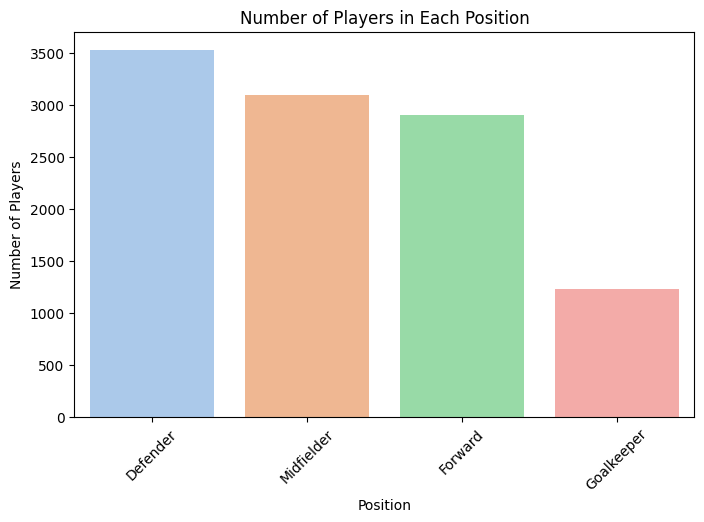

In [43]:
# Count the number of players in each position
position_counts = df['position_label'].value_counts()

# Plot the bar chart using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=position_counts.index, y=position_counts.values, palette="pastel")

# Add labels and title
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.title("Number of Players in Each Position")
plt.xticks(rotation=45)

# Show the plot
plt.show()

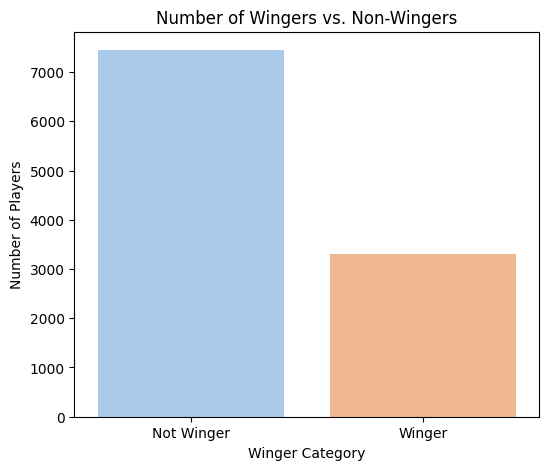

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of players for each winger category
winger_counts = df['winger_label'].value_counts()

# Plot the bar chart using seaborn
plt.figure(figsize=(6, 5))
sns.barplot(x=winger_counts.index, y=winger_counts.values, palette='pastel')

# Add labels and title
plt.xlabel("Winger Category")
plt.ylabel("Number of Players")
plt.title("Number of Wingers vs. Non-Wingers")

# Show the plot
plt.show()


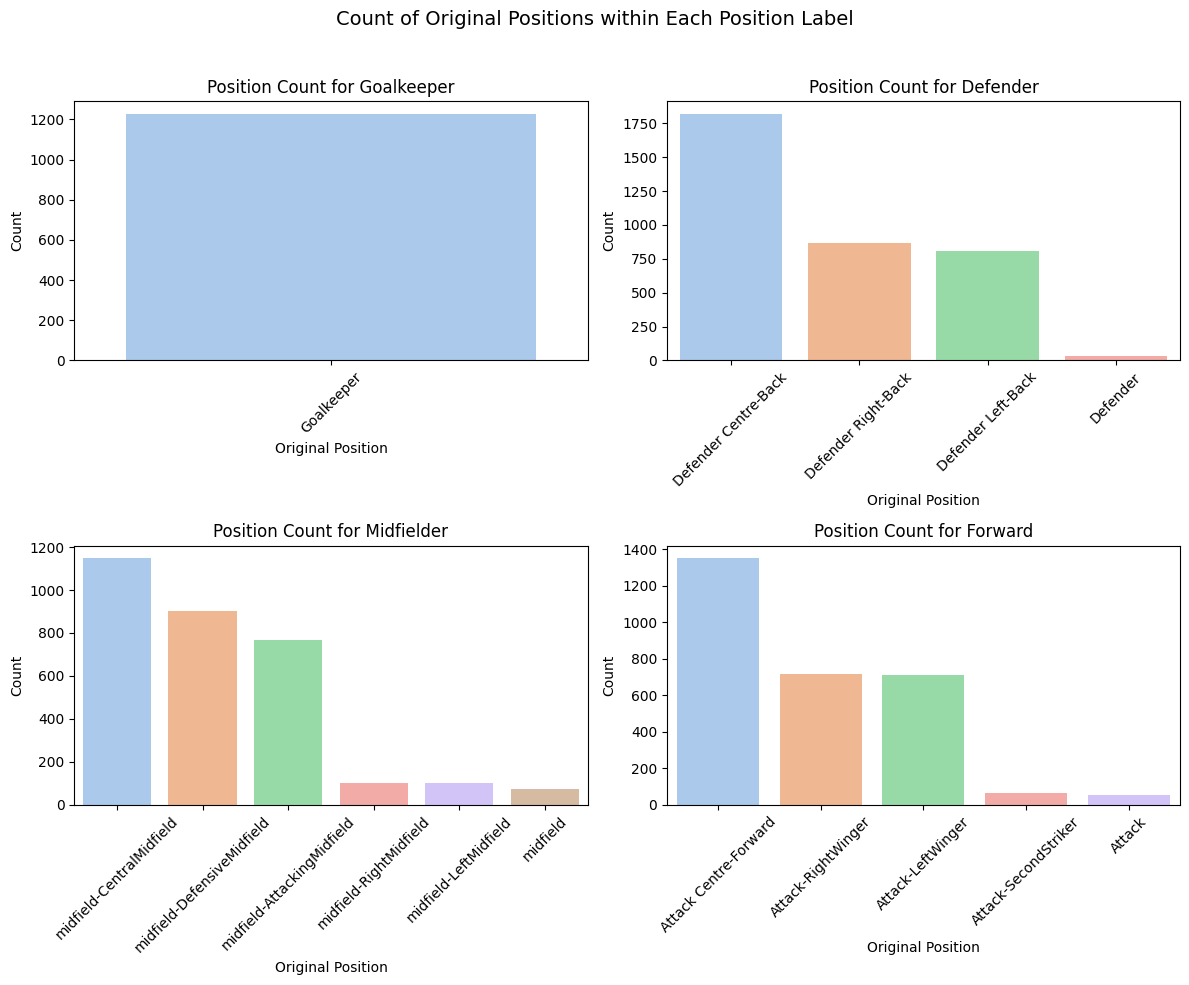

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Count of Original Positions within Each Position Label", fontsize=14)

# Get unique position labels
position_labels = df['position_label'].unique()

# Loop through each position label and create a bar plot for position counts
for i, pos_label in enumerate(position_labels):
    ax = axes[i // 2, i % 2]  # Arrange in 2x2 grid
    subset = df[df['position_label'] == pos_label]  # Filter by position label
    position_counts = subset['position'].value_counts()  # Count occurrences of original positions
    
    sns.barplot(x=position_counts.index, y=position_counts.values, ax=ax, palette="pastel")
    ax.set_title(f"Position Count for {pos_label}")
    ax.set_xlabel("Original Position")
    ax.set_ylabel("Count")
    ax.set_xticklabels(position_counts.index, rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


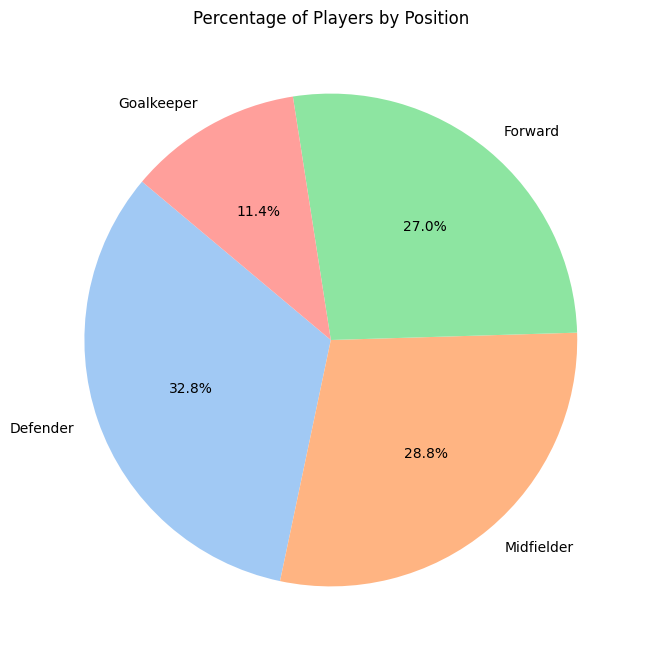

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of players in each position label
position_counts = df['position_label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

# Add title
plt.title("Percentage of Players by Position")

# Show the chart
plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

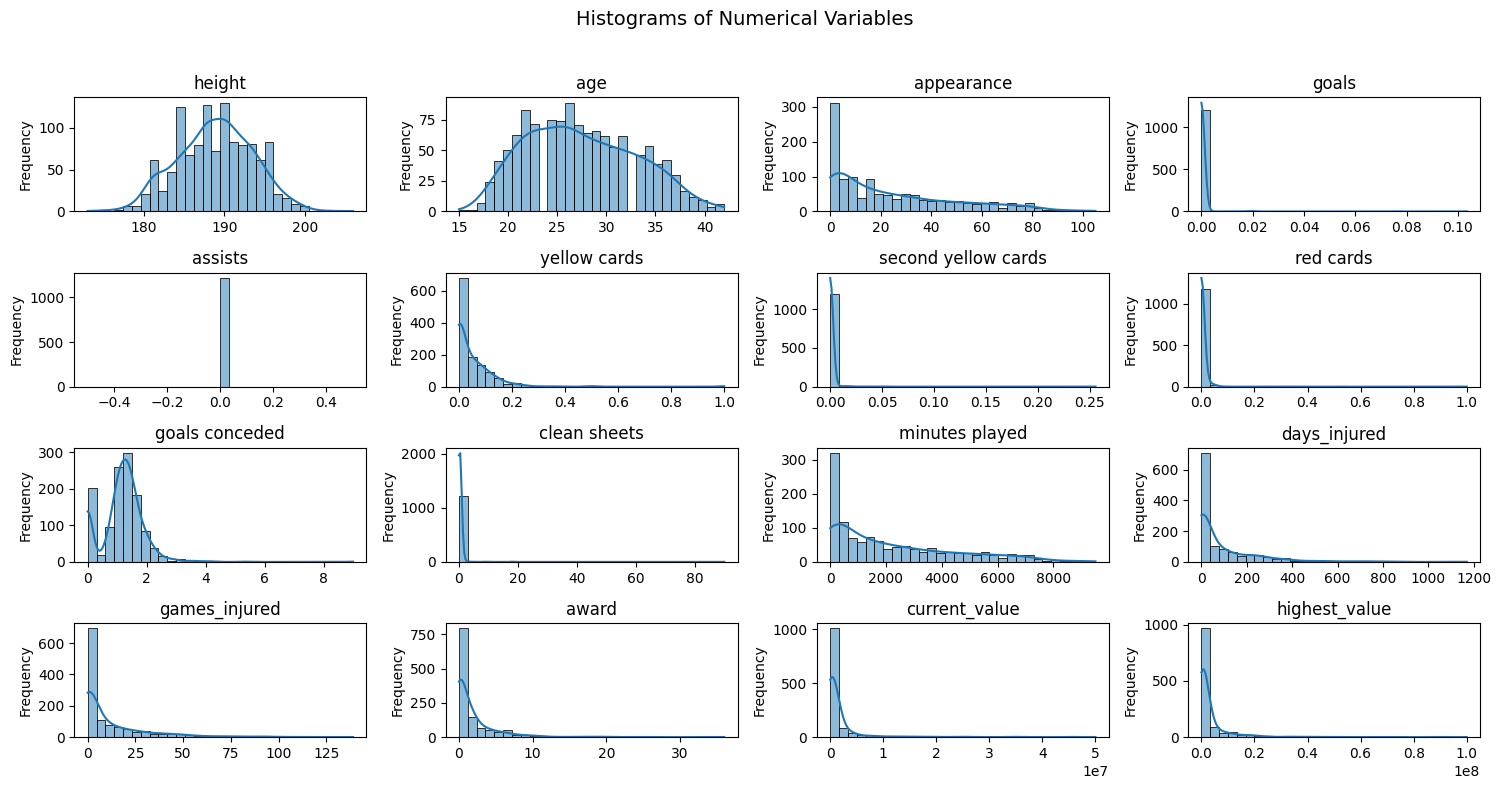

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to visualize
numerical_columns = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 
    'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 
    'minutes played', 'days_injured', 'games_injured', 'award', 
    'current_value', 'highest_value'
]

# Set up the figure for histograms
plt.figure(figsize=(15, 8))
plt.suptitle("Histograms of Numerical Variables", fontsize=14)

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_goalkeepers[col], bins=30, kde=True, palette= 'pastel')
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


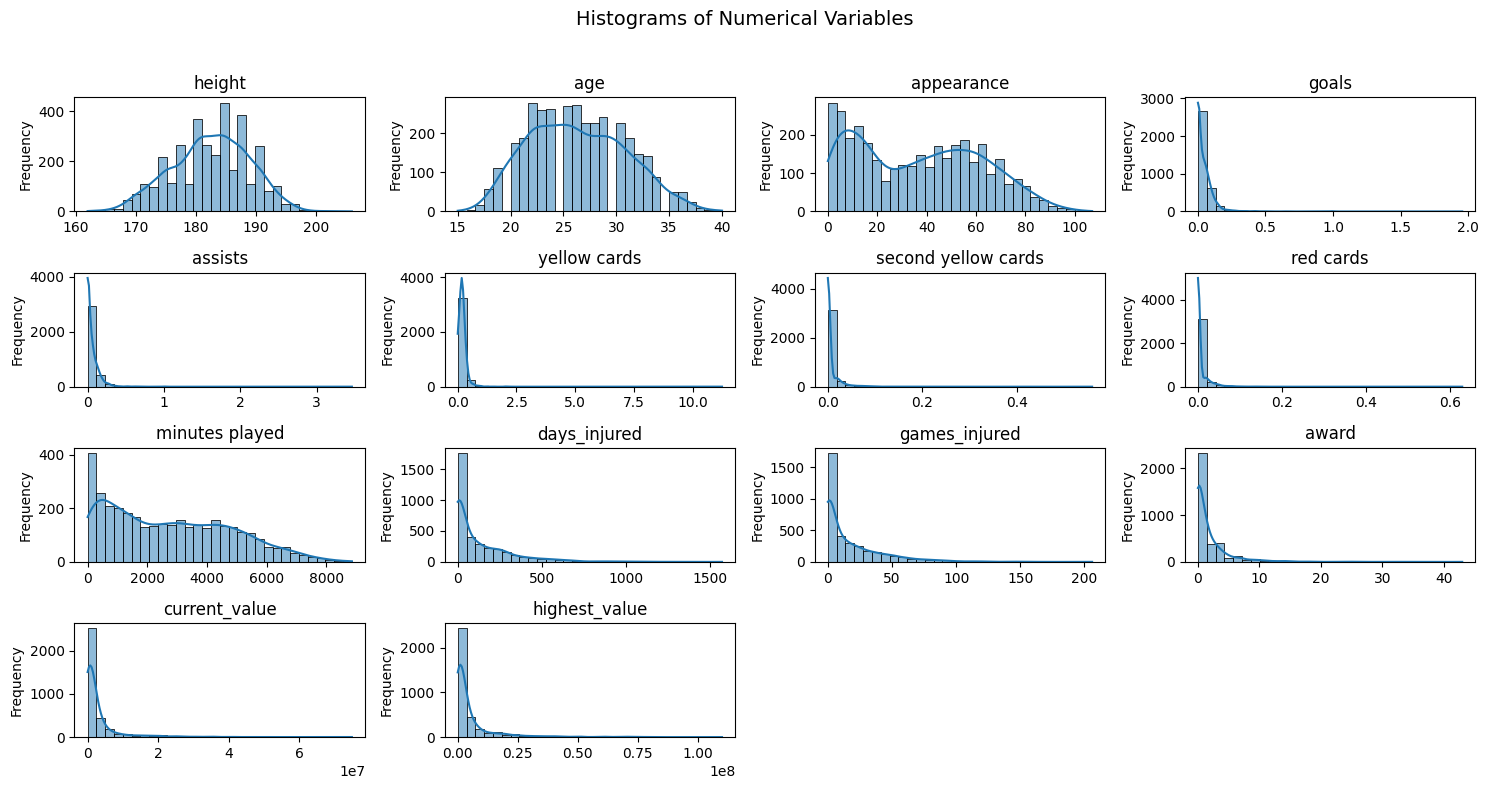

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to visualize
numerical_columns = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 
    'second yellow cards', 'red cards', 'minutes played', 'days_injured', 'games_injured', 'award', 
    'current_value', 'highest_value'
]

# Set up the figure for histograms
plt.figure(figsize=(15, 8))
plt.suptitle("Histograms of Numerical Variables", fontsize=14)

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_defenders[col], bins=30, kde=True, palette= 'pastel')
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


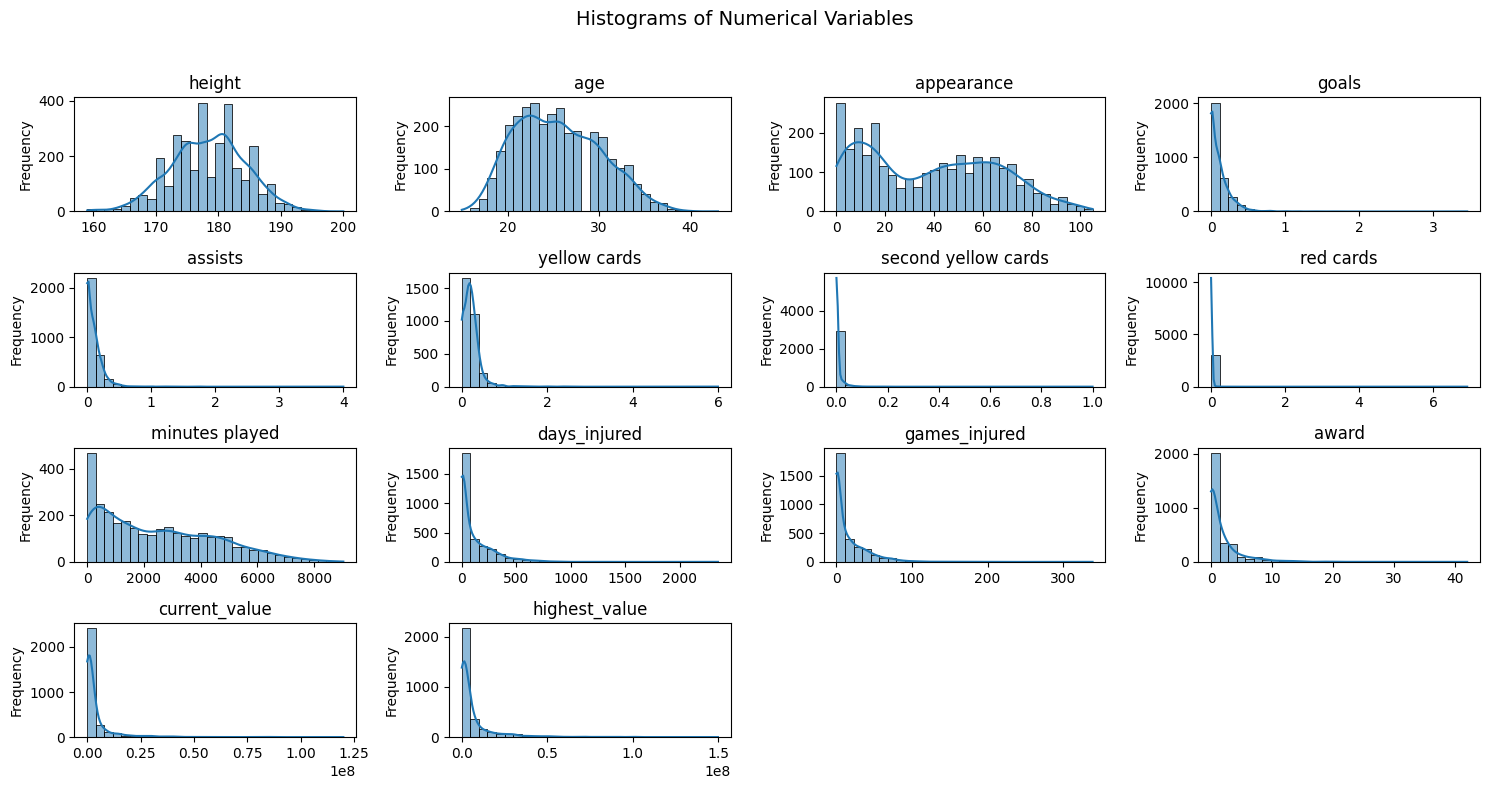

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to visualize
numerical_columns = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 
    'second yellow cards', 'red cards', 'minutes played', 'days_injured', 'games_injured', 'award', 
    'current_value', 'highest_value'
]

# Set up the figure for histograms
plt.figure(figsize=(15, 8))
plt.suptitle("Histograms of Numerical Variables", fontsize=14)

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_midfielders[col], bins=30, kde=True, palette= 'pastel')
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


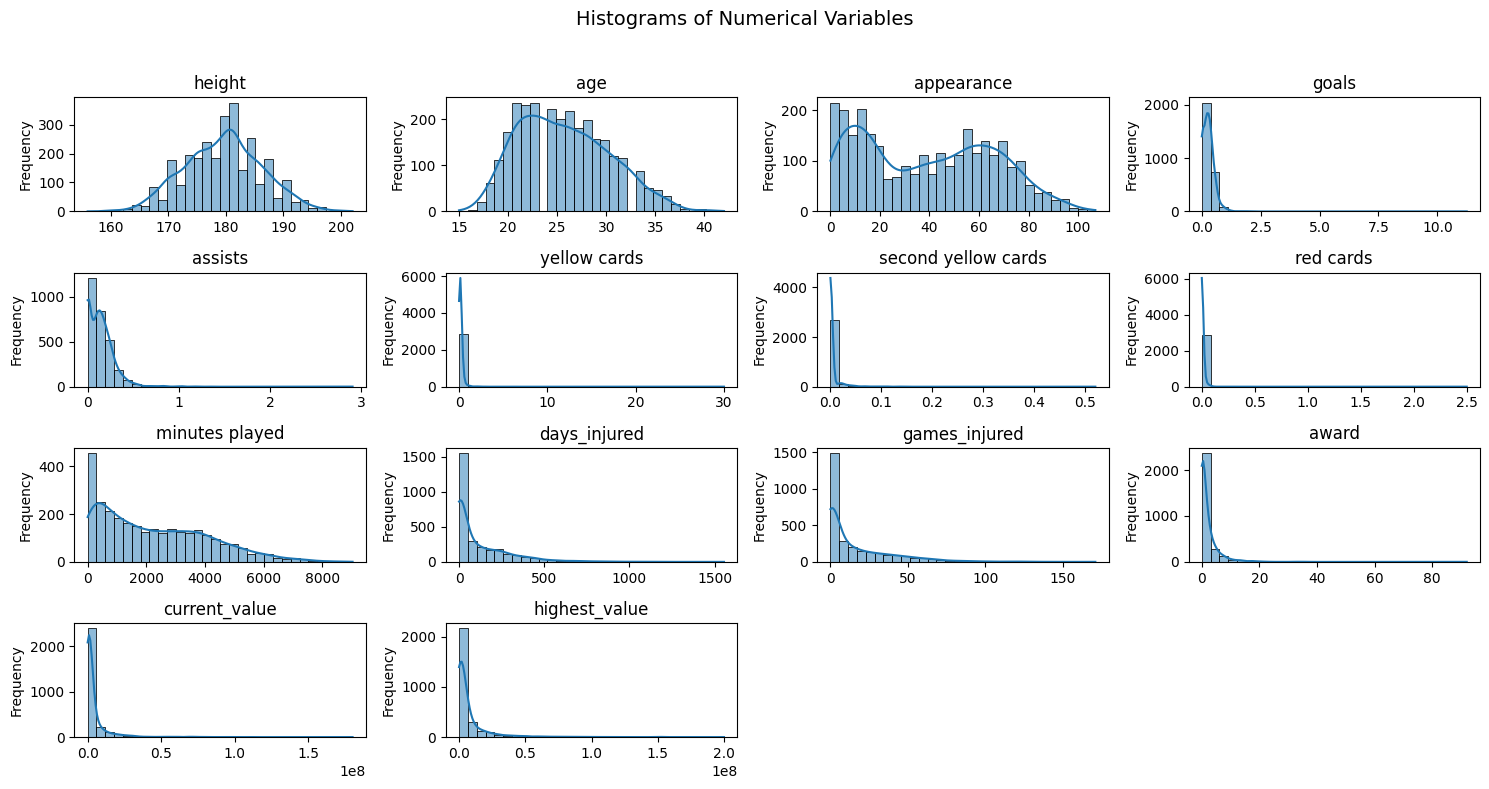

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to visualize
numerical_columns = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 
    'second yellow cards', 'red cards', 'minutes played', 'days_injured', 'games_injured', 'award', 
    'current_value', 'highest_value'
]

# Set up the figure for histograms
plt.figure(figsize=(15, 8))
plt.suptitle("Histograms of Numerical Variables", fontsize=14)

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_forwards[col], bins=30, kde=True, palette= 'pastel')
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

In [51]:
df.columns

Index(['team', 'name', 'position', 'height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger', 'position_label', 'winger_label'],
      dtype='object')

### Q1: How Do Transfer Values Compare Across Positions?

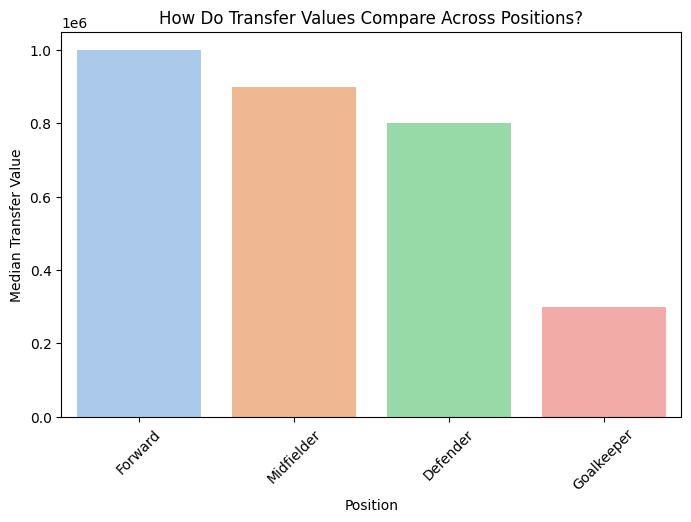

In [52]:
# Calculate the median transfer value for each position (less affected by outliers)
median_value_by_position = df.groupby('position_label')['current_value'].median().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=median_value_by_position.index, y=median_value_by_position.values, palette="pastel")
plt.xlabel("Position")
plt.ylabel("Median Transfer Value")
plt.title("How Do Transfer Values Compare Across Positions?")
plt.xticks(rotation=45)
plt.show()


### Q2: Whats relationship Between Age and Transfer Value?

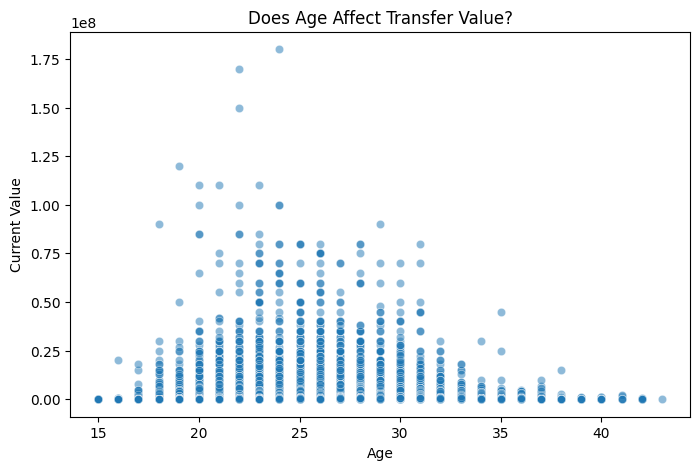

In [53]:
# Scatter plot for age vs. transfer value
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['age'], y=df['current_value'], alpha=0.5, 
                palette='pastel')
plt.xlabel("Age")
plt.ylabel("Current Value")
plt.title("Does Age Affect Transfer Value?")
plt.show()

### Q3:  How Does Having Awards Affect Transfer Value?

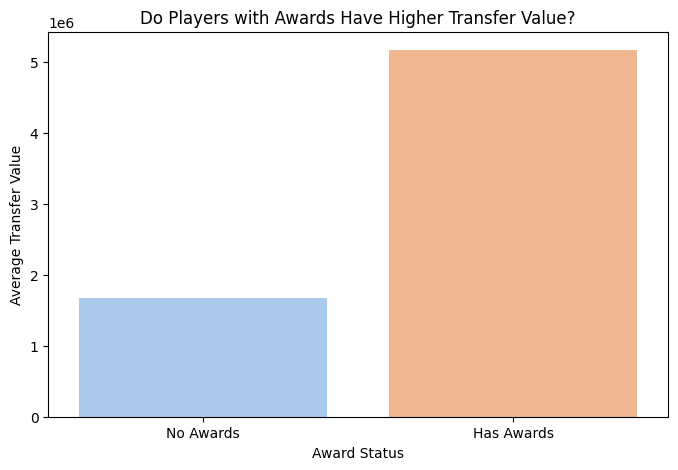

In [54]:
# Create two groups: Players with awards vs. Players without awards
df_all_positions = df.copy()
df_all_positions['has_award'] = df_all_positions['award'] > 0

# Calculate average transfer value for both groups
avg_value_awards = df_all_positions.groupby('has_award')['current_value'].mean()

# Rename index for better readability
avg_value_awards.index = ["No Awards", "Has Awards"]

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=avg_value_awards.index, y=avg_value_awards.values, palette="pastel")
plt.xlabel("Award Status")
plt.ylabel("Average Transfer Value")
plt.title("Do Players with Awards Have Higher Transfer Value?")
plt.show()


### Q4:  Which Positions Have the Most Injured Players? 

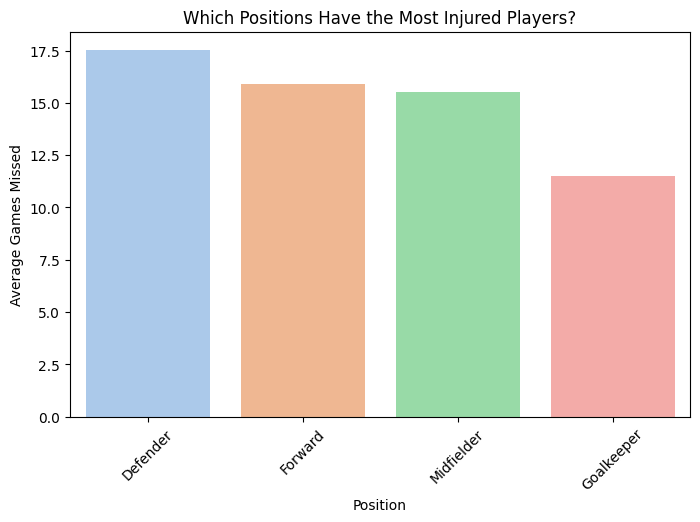

In [55]:
# Group by position and calculate average games missed due to injury
avg_games_missed_by_position = df_all_positions.groupby('position_label')['games_injured'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=avg_games_missed_by_position.index, y=avg_games_missed_by_position.values, palette="pastel")
plt.xlabel("Position")
plt.ylabel("Average Games Missed")
plt.title("Which Positions Have the Most Injured Players?")
plt.xticks(rotation=45)
plt.show()

### Q5: How Much Value Do Players Retain Over Time?

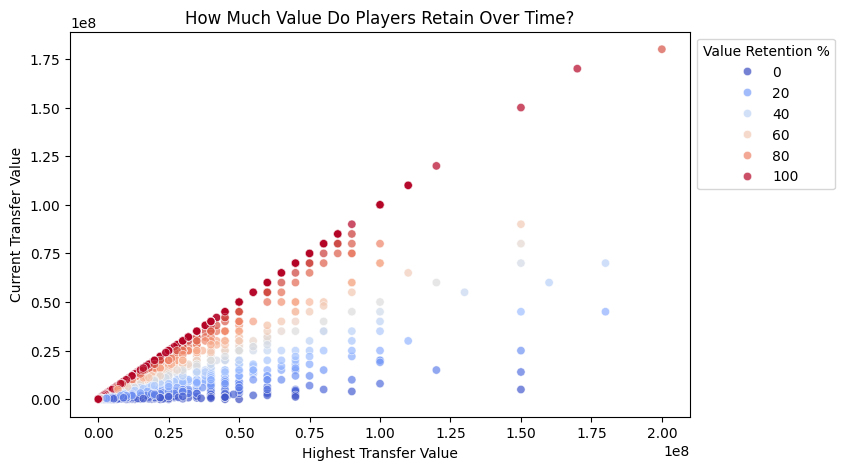

In [56]:
# Create a new column for value retention percentage
df_all_positions['value_retention'] = (df_all_positions['current_value'] / df_all_positions['highest_value']) * 100

# Scatter plot: Highest value vs. Current value with color indicating retention
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df_all_positions['highest_value'], 
    y=df_all_positions['current_value'], 
    hue=df_all_positions['value_retention'], 
    palette="coolwarm", alpha=0.7
)

plt.xlabel("Highest Transfer Value")
plt.ylabel("Current Transfer Value")
plt.title("How Much Value Do Players Retain Over Time?")
plt.legend(title="Value Retention %", loc="upper left", bbox_to_anchor=(1,1))
plt.show()


**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

## ML Model Building

### Goalkeeper Model

In [57]:
df_goalkeepers.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_label,winger_label
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0,Goalkeeper,Not Winger
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0,Goalkeeper,Not Winger
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0,Goalkeeper,Not Winger
32,West Ham United,Alphonse Areola,Goalkeeper,195.0,30.0,41,0.0,0.0,0.000000,0.0,0.0,0.898502,0.449251,3606,34,4,16,8000000,17500000,1,0,Goalkeeper,Not Winger
33,West Ham United,Lukasz Fabianski,Goalkeeper,190.0,38.0,75,0.0,0.0,0.040767,0.0,0.0,1.331723,0.271780,6623,554,99,4,1000000,9000000,1,0,Goalkeeper,Not Winger


In [58]:
df_goalkeepers.shape

(1217, 23)

In [59]:
# Delete the names since they are irrelevant to the predictive process
df_goalkeepers.drop(columns='name', inplace = True)
# Drop the 'position_encoded' and 'winger' columns since we created two with the same meaning and they will be one hot encoded
df_goalkeepers.drop(columns= ['position_encoded', 'winger'], inplace = True)
df_goalkeepers.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_label          object
winger_label            object
dtype: object

In [60]:
categorical_columns = ['team', 'position', 'position_label', 'winger_label']

numerical_columns = ['height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value']

In [61]:
df_goalkeepers = pd.get_dummies(df_goalkeepers, columns=categorical_columns)

In [62]:
df_goalkeepers.shape

(1217, 393)

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# For reproducibility
random_state = 23


In [64]:
# Compute and display correlation with 'current_value'
correlation = df_goalkeepers.corr()
print("Top correlations with current_value:")
print(correlation['current_value'].sort_values(ascending=False).head())

# # Plot the correlation heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_goalkeepers.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Feature Correlation Matrix")
# plt.show()

# Define a grid of thresholds to test for feature selection
thresholds = [0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.25, 0.27, 0.3, 0.32, 0.35, 0.37, 0.4, 0.42, 0.45, 0.47, 0.5, 0.53, 0.55, 0.57, 0.6, 0.63, 0.65, 0.67, 0.7]

Top correlations with current_value:
current_value     1.000000
highest_value     0.851436
minutes played    0.484783
appearance        0.483528
award             0.267258
Name: current_value, dtype: float64


In [65]:
# Define scoring metrics for cross validation
scoring = {
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

def evaluate_models_for_threshold(threshold):
    """
    For a given correlation threshold, select features from df_goalkeepers,
    then evaluate three models (Linear, Ridge, Lasso) using 5-fold cross validation.
    Ridge and Lasso include an inner grid search over alpha with an extended grid.
    Returns a dictionary with average train and test metrics.
    """
    # Select features based on the threshold (using absolute correlation)
    selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
    # Ensure that the target is included
    if 'current_value' not in selected_features:
        selected_features = selected_features.union(['current_value'])
    df_selected = df_goalkeepers[selected_features].copy()
    
    # Prepare X and y
    X = df_selected.drop(columns=['current_value'])
    y = df_selected['current_value']
    
    cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
    results = {}
    
    # Linear Regression
    pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
    cv_results_lr = cross_validate(pipe_lr, X, y, cv=cv, scoring=scoring, return_train_score=True)
    results['LinearRegression'] = {
        'MSE_train': -np.mean(cv_results_lr['train_MSE']),
        'MSE_test': -np.mean(cv_results_lr['test_MSE']),
        'MAE_train': -np.mean(cv_results_lr['train_MAE']),
        'MAE_test': -np.mean(cv_results_lr['test_MAE']),
        'R2_train': np.mean(cv_results_lr['train_R2']),
        'R2_test': np.mean(cv_results_lr['test_R2'])
    }
    
    # Ridge Regression with expanded grid for alpha
    pipe_ridge = make_pipeline(StandardScaler(), Ridge())
    param_grid_ridge = {'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
    grid_ridge = GridSearchCV(pipe_ridge, param_grid=param_grid_ridge,
                              cv=cv, scoring='neg_mean_squared_error', refit=True)
    grid_ridge.fit(X, y)
    best_ridge = grid_ridge.best_estimator_
    cv_results_ridge = cross_validate(best_ridge, X, y, cv=cv, scoring=scoring, return_train_score=True)
    results['Ridge'] = {
        'best_alpha': grid_ridge.best_params_['ridge__alpha'],
        'MSE_train': -np.mean(cv_results_ridge['train_MSE']),
        'MSE_test': -np.mean(cv_results_ridge['test_MSE']),
        'MAE_train': -np.mean(cv_results_ridge['train_MAE']),
        'MAE_test': -np.mean(cv_results_ridge['test_MAE']),
        'R2_train': np.mean(cv_results_ridge['train_R2']),
        'R2_test': np.mean(cv_results_ridge['test_R2'])
    }
    
    # Lasso Regression with expanded grid for alpha
    pipe_lasso = make_pipeline(StandardScaler(), Lasso(max_iter=10000))
    param_grid_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
    grid_lasso = GridSearchCV(pipe_lasso, param_grid=param_grid_lasso,
                              cv=cv, scoring='neg_mean_squared_error', refit=True)
    grid_lasso.fit(X, y)
    best_lasso = grid_lasso.best_estimator_
    cv_results_lasso = cross_validate(best_lasso, X, y, cv=cv, scoring=scoring, return_train_score=True)
    results['Lasso'] = {
        'best_alpha': grid_lasso.best_params_['lasso__alpha'],
        'MSE_train': -np.mean(cv_results_lasso['train_MSE']),
        'MSE_test': -np.mean(cv_results_lasso['test_MSE']),
        'MAE_train': -np.mean(cv_results_lasso['train_MAE']),
        'MAE_test': -np.mean(cv_results_lasso['test_MAE']),
        'R2_train': np.mean(cv_results_lasso['train_R2']),
        'R2_test': np.mean(cv_results_lasso['test_R2'])
    }
    
    # Also record the number of features used
    results['num_features'] = X.shape[1]
    
    return results


In [66]:
grid_search_results = {}

for thresh in thresholds:
    print(f"Evaluating threshold: {thresh}")
    results = evaluate_models_for_threshold(thresh)
    grid_search_results[thresh] = results
    print(f"  Number of features selected: {results['num_features']}")
    print("  Linear Regression Test MAE: {:.2e}".format(results['LinearRegression']['MAE_test']))
    print("  Ridge Test MAE: {:.2e} (best alpha: {})".format(results['Ridge']['MAE_test'],
                                                              results['Ridge']['best_alpha']))
    print("  Lasso Test MAE: {:.2e} (best alpha: {})".format(results['Lasso']['MAE_test'],
                                                              results['Lasso']['best_alpha']))
    print("-" * 40)

# Identify the best threshold for each model based on lowest test MAE
best_thresh = {}
for model in ['LinearRegression', 'Ridge', 'Lasso']:
    best_val = np.inf
    best_t = None
    for thresh, res in grid_search_results.items():
        mae = res[model]['MAE_test']
        if mae < best_val:
            best_val = mae
            best_t = thresh
    best_thresh[model] = best_t
    print(f"Best threshold for {model}: {best_t} with Test MAE: {best_val:.2e}")


Evaluating threshold: 0.1
  Number of features selected: 14
  Linear Regression Test MAE: 1.15e+06
  Ridge Test MAE: 1.15e+06 (best alpha: 10)
  Lasso Test MAE: 1.14e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.12
  Number of features selected: 13
  Linear Regression Test MAE: 1.14e+06
  Ridge Test MAE: 1.14e+06 (best alpha: 10)
  Lasso Test MAE: 1.13e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.14
  Number of features selected: 11
  Linear Regression Test MAE: 1.13e+06
  Ridge Test MAE: 1.13e+06 (best alpha: 1)
  Lasso Test MAE: 1.12e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.16
  Number of features selected: 7
  Linear Regression Test MAE: 1.10e+06
  Ridge Test MAE: 1.10e+06 (best alpha: 0.01)
  Lasso Test MAE: 1.10e+06 (best alpha: 0.001)
----------------------------------------
Evaluating threshold: 0.18
  Number of features selected: 5
  Linear Regr


Processing LinearRegression
Using best threshold: 0.5
Average Metrics (via cross validation):
  MSE Train: 6.46e+12
  MSE Test: 6.71e+12
  MAE Train: 9.83e+05
  MAE Test: 9.96e+05
  R2 Train: 0.725
  R2 Test: 0.694


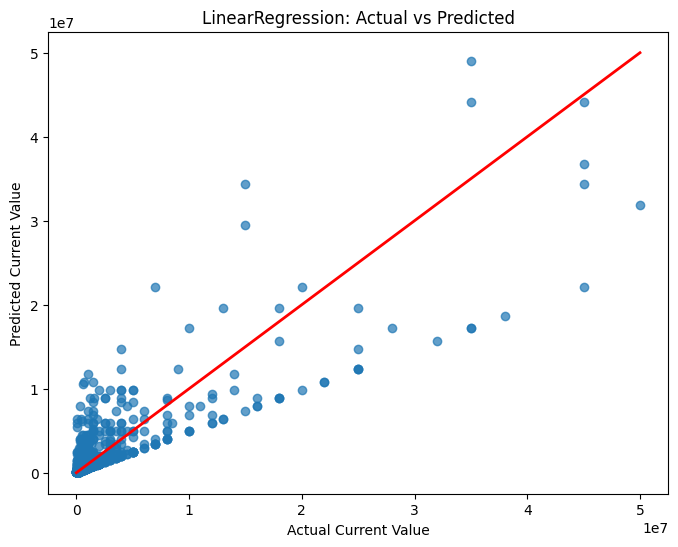

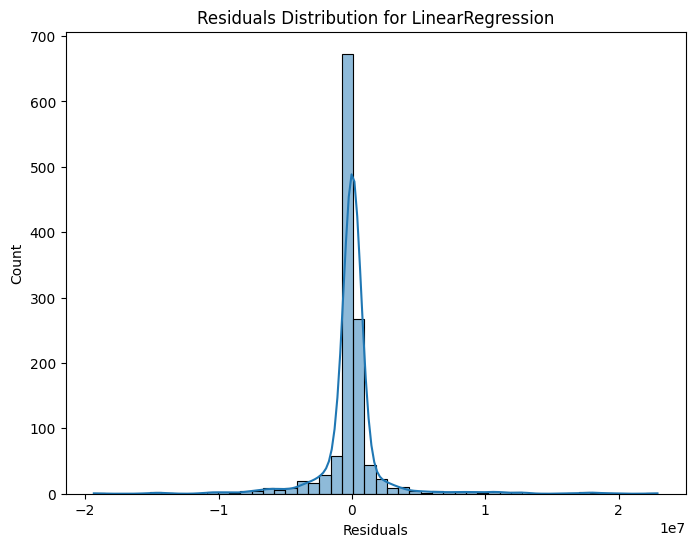


Processing Ridge
Using best threshold: 0.5
Best hyperparameter for Ridge: 10
Average Metrics (via cross validation):
  MSE Train: 6.47e+12
  MSE Test: 6.71e+12
  MAE Train: 9.81e+05
  MAE Test: 9.94e+05
  R2 Train: 0.725
  R2 Test: 0.694


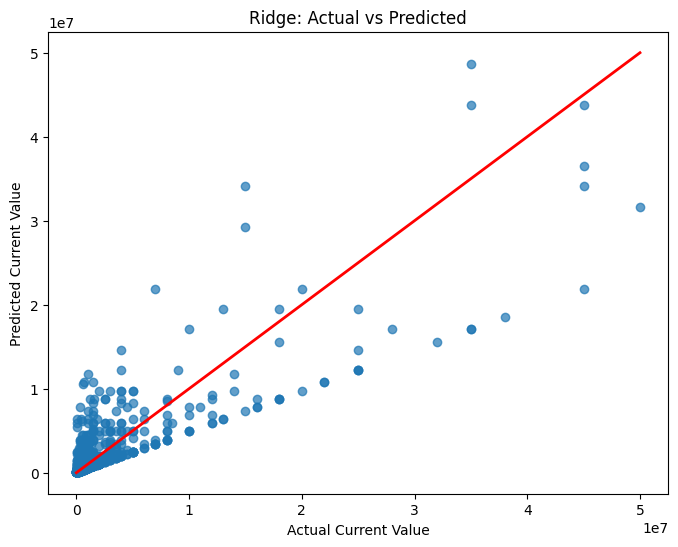

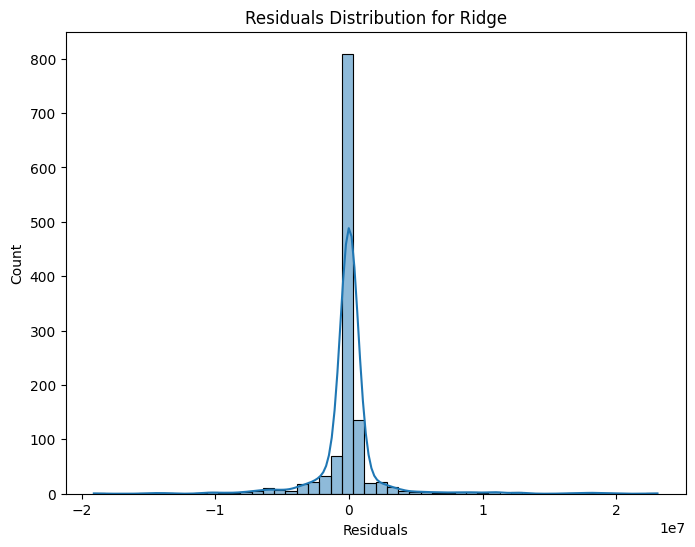


Processing Lasso
Using best threshold: 0.5
Best hyperparameter for Lasso: 10000
Average Metrics (via cross validation):
  MSE Train: 6.46e+12
  MSE Test: 6.71e+12
  MAE Train: 9.82e+05
  MAE Test: 9.96e+05
  R2 Train: 0.725
  R2 Test: 0.694


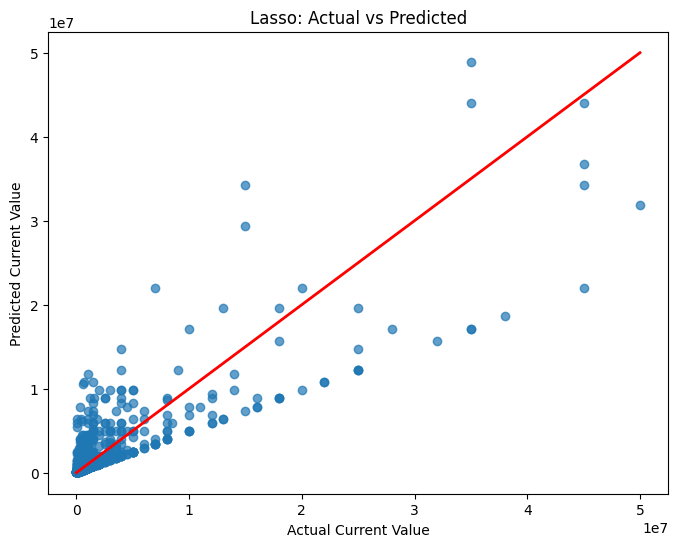

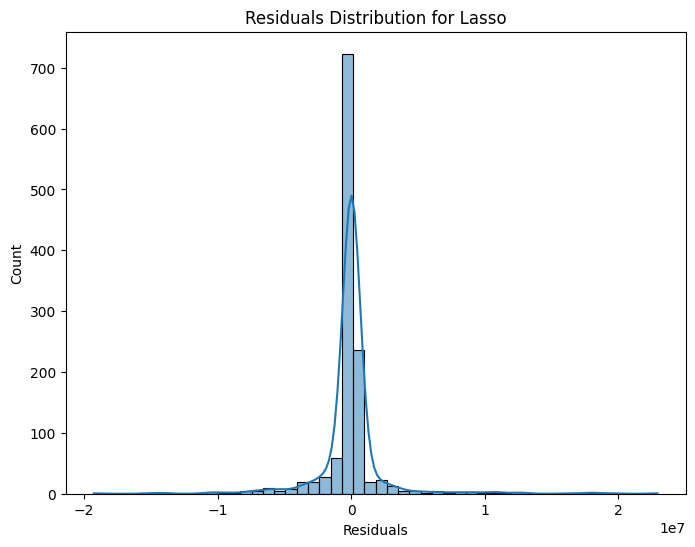

In [67]:
# Expanded hyperparameter grids for Ridge and Lasso (even larger ranges)
ridge_param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_param_grid = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

cv = KFold(n_splits=5, shuffle=True, random_state=random_state)

final_results = {}

for model_name in ['LinearRegression', 'Ridge', 'Lasso']:
    print(f"\n{'='*20}\nProcessing {model_name}\n{'='*20}")
    best_threshold = best_thresh[model_name]
    print("Using best threshold:", best_threshold)
    
    # Select features based on best threshold
    selected_features = correlation[abs(correlation['current_value']) > best_threshold]['current_value'].index
    if 'current_value' not in selected_features:
        selected_features = selected_features.union(['current_value'])
    df_selected = df_goalkeepers[selected_features].copy()
    
    X_full = df_selected.drop(columns=['current_value'])
    y_full = df_selected['current_value']
    
    # Build and train the model
    if model_name == 'LinearRegression':
        pipeline_model = make_pipeline(StandardScaler(), LinearRegression())
        # No hyperparameter tuning for LinearRegression
        best_model = pipeline_model.fit(X_full, y_full)
    elif model_name == 'Ridge':
        pipeline_model = make_pipeline(StandardScaler(), Ridge())
        grid_search = GridSearchCV(pipeline_model, param_grid=ridge_param_grid,
                                   cv=cv, scoring='neg_mean_squared_error', refit=True)
        grid_search.fit(X_full, y_full)
        best_model = grid_search.best_estimator_
        print("Best hyperparameter for Ridge:", grid_search.best_params_['ridge__alpha'])
    elif model_name == 'Lasso':
        pipeline_model = make_pipeline(StandardScaler(), Lasso(max_iter=10000))
        grid_search = GridSearchCV(pipeline_model, param_grid=lasso_param_grid,
                                   cv=cv, scoring='neg_mean_squared_error', refit=True)
        grid_search.fit(X_full, y_full)
        best_model = grid_search.best_estimator_
        print("Best hyperparameter for Lasso:", grid_search.best_params_['lasso__alpha'])
    
    # Evaluate metrics using cross validation on the full data with the best model
    cv_results = cross_validate(best_model, X_full, y_full, cv=cv, scoring=scoring, return_train_score=True)
    avg_metrics = {
        'MSE_train': -np.mean(cv_results['train_MSE']),
        'MSE_test': -np.mean(cv_results['test_MSE']),
        'MAE_train': -np.mean(cv_results['train_MAE']),
        'MAE_test': -np.mean(cv_results['test_MAE']),
        'R2_train': np.mean(cv_results['train_R2']),
        'R2_test': np.mean(cv_results['test_R2']),
    }
    print("Average Metrics (via cross validation):")
    print("  MSE Train: {:.2e}".format(avg_metrics['MSE_train']))
    print("  MSE Test: {:.2e}".format(avg_metrics['MSE_test']))
    print("  MAE Train: {:.2e}".format(avg_metrics['MAE_train']))
    print("  MAE Test: {:.2e}".format(avg_metrics['MAE_test']))
    print("  R2 Train: {:.3f}".format(avg_metrics['R2_train']))
    print("  R2 Test: {:.3f}".format(avg_metrics['R2_test']))
    
    # Retrain the best model on full data and get predictions
    best_model.fit(X_full, y_full)
    predictions = best_model.predict(X_full)
    
    # Plot Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_full, predictions, alpha=0.7)
    plt.plot([y_full.min(), y_full.max()], [y_full.min(), y_full.max()], color='red', lw=2)
    plt.xlabel('Actual Current Value')
    plt.ylabel('Predicted Current Value')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.show()
    
    # Plot residual distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(y_full - predictions, bins=50, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'Residuals Distribution for {model_name}')
    plt.show()
    
    final_results[model_name] = {'best_model': best_model, 'avg_metrics': avg_metrics}


### Defender Model

In [68]:
df_defenders.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_label,winger_label
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.0,6408,175,22,9,50000000,50000000,2,0,Defender,Not Winger
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.0,5031,238,51,21,40000000,80000000,2,0,Defender,Not Winger
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,4762,148,27,1,25000000,70000000,2,0,Defender,Not Winger
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,0.0,5471,95,19,10,15000000,35000000,2,0,Defender,Not Winger
7,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.0000,0.0,416,932,169,7,2000000,20000000,2,0,Defender,Not Winger


In [69]:
df_defenders.shape

(3517, 21)

In [70]:
# Delete the names since they are irrelevant to the predictive process
df_defenders.drop(columns='name', inplace = True)
# Drop the 'position_encoded' and 'winger' columns since we created two with the same meaning and they will be one hot encoded
df_defenders.drop(columns= ['position_encoded', 'winger'], inplace = True)
df_defenders.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_label          object
winger_label            object
dtype: object

In [71]:
categorical_columns = ['team', 'position', 'position_label', 'winger_label']

numerical_columns = ['height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value']

In [72]:
df_defenders = pd.get_dummies(df_defenders, columns=categorical_columns)

In [73]:
df_defenders.shape

(3517, 394)

In [74]:
# Compute and display correlation with 'current_value'
correlation = df_defenders.corr()
print("Top correlations with current_value:")
print(correlation['current_value'].sort_values(ascending=False).head())

# # Plot the correlation heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_goalkeepers.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Feature Correlation Matrix")
# plt.show()

# Define a grid of thresholds to test for feature selection
thresholds = [0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.25, 0.27, 0.3, 0.32, 0.35, 0.37, 0.4, 0.42, 0.45, 0.47, 0.5, 0.53, 0.55, 0.57, 0.6, 0.63, 0.65, 0.67, 0.7]

Top correlations with current_value:
current_value     1.000000
highest_value     0.845191
minutes played    0.428131
appearance        0.422780
award             0.272201
Name: current_value, dtype: float64


In [75]:
# Define scoring metrics for cross validation
scoring = {
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

def evaluate_models_for_threshold(threshold):
    """
    For a given correlation threshold, select features from df_goalkeepers,
    then evaluate three models (Linear, Ridge, Lasso) using 5-fold cross validation.
    Ridge and Lasso include an inner grid search over alpha with an extended grid.
    Returns a dictionary with average train and test metrics.
    """
    # Select features based on the threshold (using absolute correlation)
    selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
    # Ensure that the target is included
    if 'current_value' not in selected_features:
        selected_features = selected_features.union(['current_value'])
    df_selected = df_defenders[selected_features].copy()
    
    # Prepare X and y
    X = df_selected.drop(columns=['current_value'])
    y = df_selected['current_value']
    
    cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
    results = {}
    
    # Linear Regression
    pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
    cv_results_lr = cross_validate(pipe_lr, X, y, cv=cv, scoring=scoring, return_train_score=True)
    results['LinearRegression'] = {
        'MSE_train': -np.mean(cv_results_lr['train_MSE']),
        'MSE_test': -np.mean(cv_results_lr['test_MSE']),
        'MAE_train': -np.mean(cv_results_lr['train_MAE']),
        'MAE_test': -np.mean(cv_results_lr['test_MAE']),
        'R2_train': np.mean(cv_results_lr['train_R2']),
        'R2_test': np.mean(cv_results_lr['test_R2'])
    }
    
    # Ridge Regression with expanded grid for alpha
    pipe_ridge = make_pipeline(StandardScaler(), Ridge())
    param_grid_ridge = {'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
    grid_ridge = GridSearchCV(pipe_ridge, param_grid=param_grid_ridge,
                              cv=cv, scoring='neg_mean_squared_error', refit=True)
    grid_ridge.fit(X, y)
    best_ridge = grid_ridge.best_estimator_
    cv_results_ridge = cross_validate(best_ridge, X, y, cv=cv, scoring=scoring, return_train_score=True)
    results['Ridge'] = {
        'best_alpha': grid_ridge.best_params_['ridge__alpha'],
        'MSE_train': -np.mean(cv_results_ridge['train_MSE']),
        'MSE_test': -np.mean(cv_results_ridge['test_MSE']),
        'MAE_train': -np.mean(cv_results_ridge['train_MAE']),
        'MAE_test': -np.mean(cv_results_ridge['test_MAE']),
        'R2_train': np.mean(cv_results_ridge['train_R2']),
        'R2_test': np.mean(cv_results_ridge['test_R2'])
    }
    
    # Lasso Regression with expanded grid for alpha
    pipe_lasso = make_pipeline(StandardScaler(), Lasso(max_iter=10000))
    param_grid_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
    grid_lasso = GridSearchCV(pipe_lasso, param_grid=param_grid_lasso,
                              cv=cv, scoring='neg_mean_squared_error', refit=True)
    grid_lasso.fit(X, y)
    best_lasso = grid_lasso.best_estimator_
    cv_results_lasso = cross_validate(best_lasso, X, y, cv=cv, scoring=scoring, return_train_score=True)
    results['Lasso'] = {
        'best_alpha': grid_lasso.best_params_['lasso__alpha'],
        'MSE_train': -np.mean(cv_results_lasso['train_MSE']),
        'MSE_test': -np.mean(cv_results_lasso['test_MSE']),
        'MAE_train': -np.mean(cv_results_lasso['train_MAE']),
        'MAE_test': -np.mean(cv_results_lasso['test_MAE']),
        'R2_train': np.mean(cv_results_lasso['train_R2']),
        'R2_test': np.mean(cv_results_lasso['test_R2'])
    }
    
    # Also record the number of features used
    results['num_features'] = X.shape[1]
    
    return results


In [76]:
grid_search_results = {}

for thresh in thresholds:
    print(f"Evaluating threshold: {thresh}")
    results = evaluate_models_for_threshold(thresh)
    grid_search_results[thresh] = results
    print(f"  Number of features selected: {results['num_features']}")
    print("  Linear Regression Test MAE: {:.2e}".format(results['LinearRegression']['MAE_test']))
    print("  Ridge Test MAE: {:.2e} (best alpha: {})".format(results['Ridge']['MAE_test'],
                                                              results['Ridge']['best_alpha']))
    print("  Lasso Test MAE: {:.2e} (best alpha: {})".format(results['Lasso']['MAE_test'],
                                                              results['Lasso']['best_alpha']))
    print("-" * 40)

# Identify the best threshold for each model based on lowest test MAE
best_thresh = {}
for model in ['LinearRegression', 'Ridge', 'Lasso']:
    best_val = np.inf
    best_t = None
    for thresh, res in grid_search_results.items():
        mae = res[model]['MAE_test']
        if mae < best_val:
            best_val = mae
            best_t = thresh
    best_thresh[model] = best_t
    print(f"Best threshold for {model}: {best_t} with Test MAE: {best_val:.2e}")


Evaluating threshold: 0.1
  Number of features selected: 18
  Linear Regression Test MAE: 1.87e+06
  Ridge Test MAE: 1.87e+06 (best alpha: 1)
  Lasso Test MAE: 1.85e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.12
  Number of features selected: 17
  Linear Regression Test MAE: 1.86e+06
  Ridge Test MAE: 1.85e+06 (best alpha: 10)
  Lasso Test MAE: 1.85e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.14
  Number of features selected: 14
  Linear Regression Test MAE: 1.86e+06
  Ridge Test MAE: 1.86e+06 (best alpha: 10)
  Lasso Test MAE: 1.85e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.16
  Number of features selected: 10
  Linear Regression Test MAE: 1.85e+06
  Ridge Test MAE: 1.85e+06 (best alpha: 10)
  Lasso Test MAE: 1.84e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.18
  Number of features selected: 8
  Linear Regre


Processing LinearRegression
Using best threshold: 0.45
Average Metrics (via cross validation):
  MSE Train: 1.65e+13
  MSE Test: 1.66e+13
  MAE Train: 1.69e+06
  MAE Test: 1.69e+06
  R2 Train: 0.714
  R2 Test: 0.708


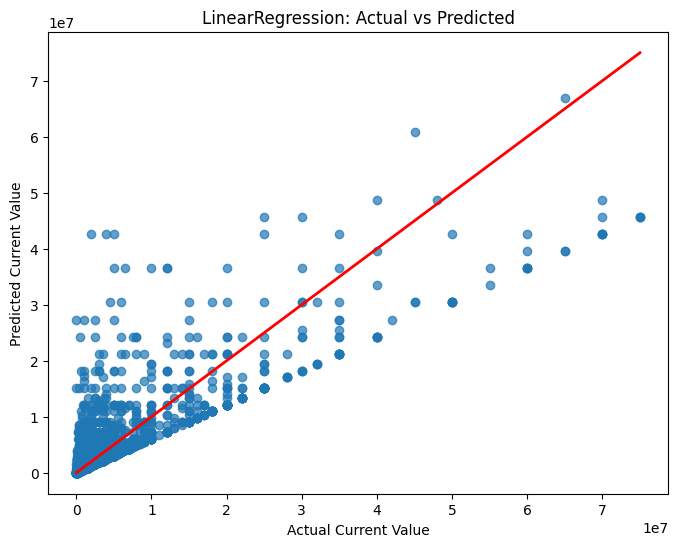

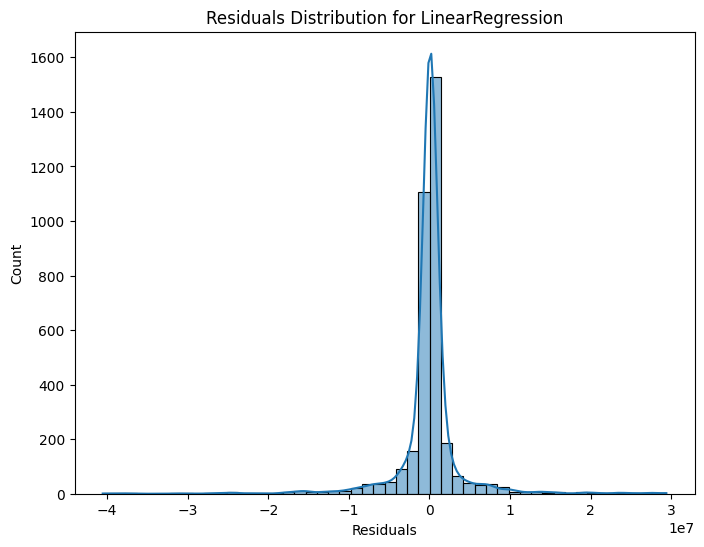


Processing Ridge
Using best threshold: 0.45
Best hyperparameter for Ridge: 0.01
Average Metrics (via cross validation):
  MSE Train: 1.65e+13
  MSE Test: 1.66e+13
  MAE Train: 1.69e+06
  MAE Test: 1.69e+06
  R2 Train: 0.714
  R2 Test: 0.708


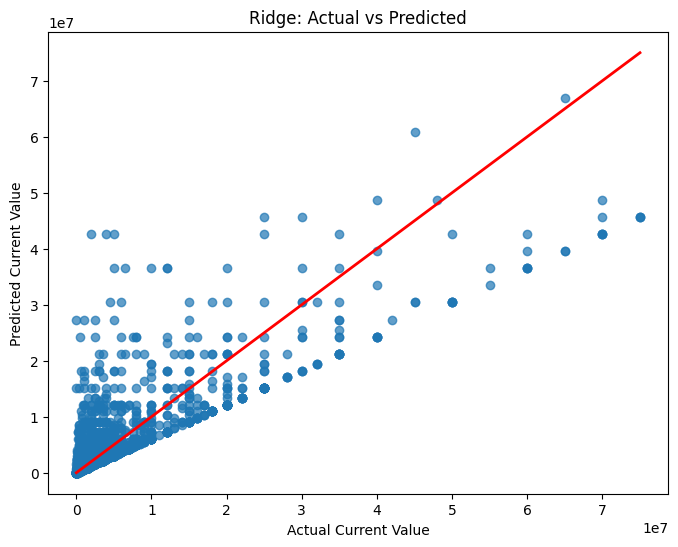

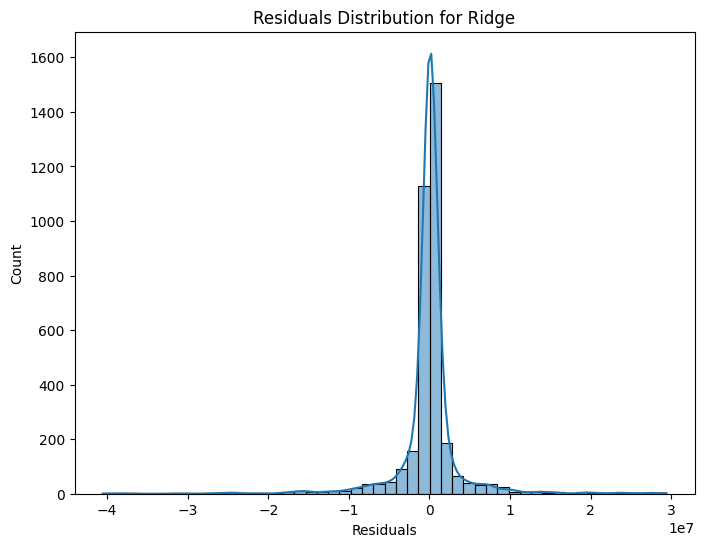


Processing Lasso
Using best threshold: 0.45
Best hyperparameter for Lasso: 0.001
Average Metrics (via cross validation):
  MSE Train: 1.65e+13
  MSE Test: 1.66e+13
  MAE Train: 1.69e+06
  MAE Test: 1.69e+06
  R2 Train: 0.714
  R2 Test: 0.708


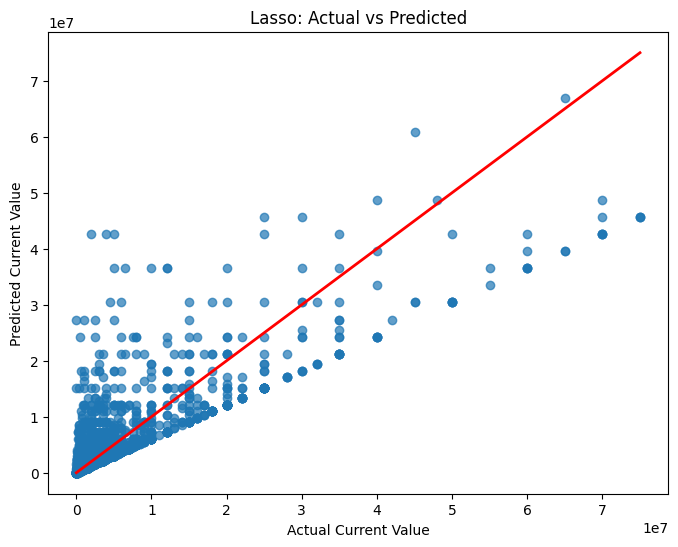

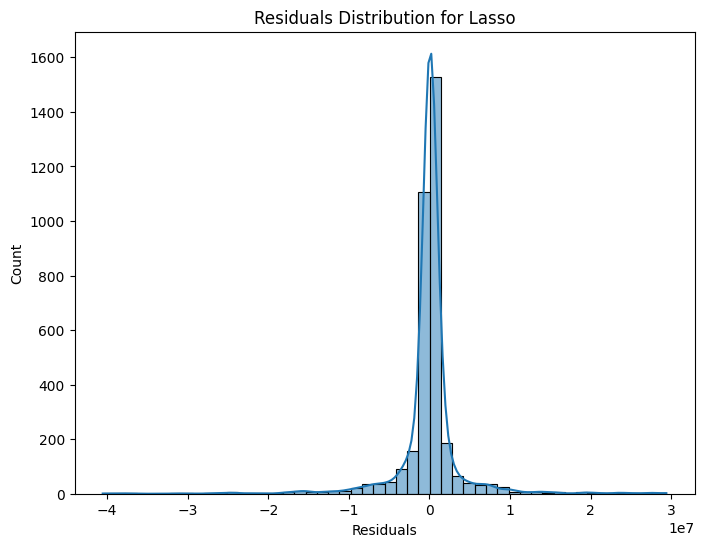

In [77]:
# Expanded hyperparameter grids for Ridge and Lasso (even larger ranges)
ridge_param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_param_grid = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

cv = KFold(n_splits=5, shuffle=True, random_state=random_state)

final_results = {}

for model_name in ['LinearRegression', 'Ridge', 'Lasso']:
    print(f"\n{'='*20}\nProcessing {model_name}\n{'='*20}")
    best_threshold = best_thresh[model_name]
    print("Using best threshold:", best_threshold)
    
    # Select features based on best threshold
    selected_features = correlation[abs(correlation['current_value']) > best_threshold]['current_value'].index
    if 'current_value' not in selected_features:
        selected_features = selected_features.union(['current_value'])
    df_selected = df_defenders[selected_features].copy()
    
    X_full = df_selected.drop(columns=['current_value'])
    y_full = df_selected['current_value']
    
    # Build and train the model
    if model_name == 'LinearRegression':
        pipeline_model = make_pipeline(StandardScaler(), LinearRegression())
        # No hyperparameter tuning for LinearRegression
        best_model = pipeline_model.fit(X_full, y_full)
    elif model_name == 'Ridge':
        pipeline_model = make_pipeline(StandardScaler(), Ridge())
        grid_search = GridSearchCV(pipeline_model, param_grid=ridge_param_grid,
                                   cv=cv, scoring='neg_mean_squared_error', refit=True)
        grid_search.fit(X_full, y_full)
        best_model = grid_search.best_estimator_
        print("Best hyperparameter for Ridge:", grid_search.best_params_['ridge__alpha'])
    elif model_name == 'Lasso':
        pipeline_model = make_pipeline(StandardScaler(), Lasso(max_iter=10000))
        grid_search = GridSearchCV(pipeline_model, param_grid=lasso_param_grid,
                                   cv=cv, scoring='neg_mean_squared_error', refit=True)
        grid_search.fit(X_full, y_full)
        best_model = grid_search.best_estimator_
        print("Best hyperparameter for Lasso:", grid_search.best_params_['lasso__alpha'])
    
    # Evaluate metrics using cross validation on the full data with the best model
    cv_results = cross_validate(best_model, X_full, y_full, cv=cv, scoring=scoring, return_train_score=True)
    avg_metrics = {
        'MSE_train': -np.mean(cv_results['train_MSE']),
        'MSE_test': -np.mean(cv_results['test_MSE']),
        'MAE_train': -np.mean(cv_results['train_MAE']),
        'MAE_test': -np.mean(cv_results['test_MAE']),
        'R2_train': np.mean(cv_results['train_R2']),
        'R2_test': np.mean(cv_results['test_R2']),
    }
    print("Average Metrics (via cross validation):")
    print("  MSE Train: {:.2e}".format(avg_metrics['MSE_train']))
    print("  MSE Test: {:.2e}".format(avg_metrics['MSE_test']))
    print("  MAE Train: {:.2e}".format(avg_metrics['MAE_train']))
    print("  MAE Test: {:.2e}".format(avg_metrics['MAE_test']))
    print("  R2 Train: {:.3f}".format(avg_metrics['R2_train']))
    print("  R2 Test: {:.3f}".format(avg_metrics['R2_test']))
    
    # Retrain the best model on full data and get predictions
    best_model.fit(X_full, y_full)
    predictions = best_model.predict(X_full)
    
    # Plot Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_full, predictions, alpha=0.7)
    plt.plot([y_full.min(), y_full.max()], [y_full.min(), y_full.max()], color='red', lw=2)
    plt.xlabel('Actual Current Value')
    plt.ylabel('Predicted Current Value')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.show()
    
    # Plot residual distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(y_full - predictions, bins=50, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'Residuals Distribution for {model_name}')
    plt.show()
    
    final_results[model_name] = {'best_model': best_model, 'avg_metrics': avg_metrics}


### Midfielder Model

In [78]:
df_midfielders.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_label,winger_label
14,Manchester United,Casemiro,midfield-DefensiveMidfield,185.0,31.0,101,0.090817,0.124874,0.329213,0.0,0.022704,7928,174,31,23,50000000,80000000,3,0,Midfielder,Not Winger
15,Manchester United,Scott McTominay,midfield-DefensiveMidfield,191.0,26.0,76,0.096010,0.038404,0.384041,0.0,0.000000,4687,249,53,2,25000000,35000000,3,0,Midfielder,Not Winger
16,Manchester United,Christian Eriksen,midfield-CentralMidfield,182.0,31.0,55,0.067214,0.313667,0.089619,0.0,0.000000,4017,0,0,10,25000000,100000000,3,0,Midfielder,Not Winger
17,Manchester United,Marcel Sabitzer,midfield-CentralMidfield,177.0,29.0,74,0.144046,0.086428,0.230474,0.0,0.000000,3124,280,35,8,20000000,42000000,3,0,Midfielder,Not Winger
18,Manchester United,Fred,midfield-CentralMidfield,169.0,30.0,92,0.184843,0.221811,0.332717,0.0,0.000000,4869,45,10,11,20000000,50000000,3,0,Midfielder,Not Winger


In [79]:
df_midfielders.shape

(3086, 21)

In [80]:
# Delete the names since they are irrelevant to the predictive process
df_midfielders.drop(columns='name', inplace = True)
# Drop the 'position_encoded' and 'winger' columns since we created two with the same meaning and they will be one hot encoded
df_midfielders.drop(columns= ['position_encoded', 'winger'], inplace = True)
df_midfielders.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_label          object
winger_label            object
dtype: object

In [81]:
categorical_columns = ['team', 'position', 'position_label', 'winger_label']

numerical_columns = ['height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value']

In [82]:
df_midfielders = pd.get_dummies(df_midfielders, columns=categorical_columns)

In [83]:
df_midfielders.shape

(3086, 397)

In [84]:
# Compute and display correlation with 'current_value'
correlation = df_midfielders.corr()
print("Top correlations with current_value:")
print(correlation['current_value'].sort_values(ascending=False).head())

# # Plot the correlation heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_goalkeepers.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Feature Correlation Matrix")
# plt.show()

# Define a grid of thresholds to test for feature selection
thresholds = [0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.25, 0.27, 0.3, 0.32, 0.35, 0.37, 0.4, 0.42, 0.45, 0.47, 0.5, 0.53, 0.55, 0.57, 0.6, 0.63, 0.65, 0.67, 0.7]

Top correlations with current_value:
current_value     1.000000
highest_value     0.843919
minutes played    0.445517
appearance        0.429579
award             0.295730
Name: current_value, dtype: float64


In [85]:
# Define scoring metrics for cross validation
scoring = {
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

def evaluate_models_for_threshold(threshold):
    """
    For a given correlation threshold, select features from df_goalkeepers,
    then evaluate three models (Linear, Ridge, Lasso) using 5-fold cross validation.
    Ridge and Lasso include an inner grid search over alpha with an extended grid.
    Returns a dictionary with average train and test metrics.
    """
    # Select features based on the threshold (using absolute correlation)
    selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
    # Ensure that the target is included
    if 'current_value' not in selected_features:
        selected_features = selected_features.union(['current_value'])
    df_selected = df_midfielders[selected_features].copy()
    
    # Prepare X and y
    X = df_selected.drop(columns=['current_value'])
    y = df_selected['current_value']
    
    cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
    results = {}
    
    # Linear Regression
    pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
    cv_results_lr = cross_validate(pipe_lr, X, y, cv=cv, scoring=scoring, return_train_score=True)
    results['LinearRegression'] = {
        'MSE_train': -np.mean(cv_results_lr['train_MSE']),
        'MSE_test': -np.mean(cv_results_lr['test_MSE']),
        'MAE_train': -np.mean(cv_results_lr['train_MAE']),
        'MAE_test': -np.mean(cv_results_lr['test_MAE']),
        'R2_train': np.mean(cv_results_lr['train_R2']),
        'R2_test': np.mean(cv_results_lr['test_R2'])
    }
    
    # Ridge Regression with expanded grid for alpha
    pipe_ridge = make_pipeline(StandardScaler(), Ridge())
    param_grid_ridge = {'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
    grid_ridge = GridSearchCV(pipe_ridge, param_grid=param_grid_ridge,
                              cv=cv, scoring='neg_mean_squared_error', refit=True)
    grid_ridge.fit(X, y)
    best_ridge = grid_ridge.best_estimator_
    cv_results_ridge = cross_validate(best_ridge, X, y, cv=cv, scoring=scoring, return_train_score=True)
    results['Ridge'] = {
        'best_alpha': grid_ridge.best_params_['ridge__alpha'],
        'MSE_train': -np.mean(cv_results_ridge['train_MSE']),
        'MSE_test': -np.mean(cv_results_ridge['test_MSE']),
        'MAE_train': -np.mean(cv_results_ridge['train_MAE']),
        'MAE_test': -np.mean(cv_results_ridge['test_MAE']),
        'R2_train': np.mean(cv_results_ridge['train_R2']),
        'R2_test': np.mean(cv_results_ridge['test_R2'])
    }
    
    # Lasso Regression with expanded grid for alpha
    pipe_lasso = make_pipeline(StandardScaler(), Lasso(max_iter=10000))
    param_grid_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
    grid_lasso = GridSearchCV(pipe_lasso, param_grid=param_grid_lasso,
                              cv=cv, scoring='neg_mean_squared_error', refit=True)
    grid_lasso.fit(X, y)
    best_lasso = grid_lasso.best_estimator_
    cv_results_lasso = cross_validate(best_lasso, X, y, cv=cv, scoring=scoring, return_train_score=True)
    results['Lasso'] = {
        'best_alpha': grid_lasso.best_params_['lasso__alpha'],
        'MSE_train': -np.mean(cv_results_lasso['train_MSE']),
        'MSE_test': -np.mean(cv_results_lasso['test_MSE']),
        'MAE_train': -np.mean(cv_results_lasso['train_MAE']),
        'MAE_test': -np.mean(cv_results_lasso['test_MAE']),
        'R2_train': np.mean(cv_results_lasso['train_R2']),
        'R2_test': np.mean(cv_results_lasso['test_R2'])
    }
    
    # Also record the number of features used
    results['num_features'] = X.shape[1]
    
    return results


In [86]:
grid_search_results = {}

for thresh in thresholds:
    print(f"Evaluating threshold: {thresh}")
    results = evaluate_models_for_threshold(thresh)
    grid_search_results[thresh] = results
    print(f"  Number of features selected: {results['num_features']}")
    print("  Linear Regression Test MAE: {:.2e}".format(results['LinearRegression']['MAE_test']))
    print("  Ridge Test MAE: {:.2e} (best alpha: {})".format(results['Ridge']['MAE_test'],
                                                              results['Ridge']['best_alpha']))
    print("  Lasso Test MAE: {:.2e} (best alpha: {})".format(results['Lasso']['MAE_test'],
                                                              results['Lasso']['best_alpha']))
    print("-" * 40)

# Identify the best threshold for each model based on lowest test MAE
best_thresh = {}
for model in ['LinearRegression', 'Ridge', 'Lasso']:
    best_val = np.inf
    best_t = None
    for thresh, res in grid_search_results.items():
        mae = res[model]['MAE_test']
        if mae < best_val:
            best_val = mae
            best_t = thresh
    best_thresh[model] = best_t
    print(f"Best threshold for {model}: {best_t} with Test MAE: {best_val:.2e}")


Evaluating threshold: 0.1
  Number of features selected: 21
  Linear Regression Test MAE: 2.39e+06
  Ridge Test MAE: 2.39e+06 (best alpha: 0.01)
  Lasso Test MAE: 2.38e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.12
  Number of features selected: 15
  Linear Regression Test MAE: 2.35e+06
  Ridge Test MAE: 2.35e+06 (best alpha: 0.01)
  Lasso Test MAE: 2.34e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.14
  Number of features selected: 11
  Linear Regression Test MAE: 2.35e+06
  Ridge Test MAE: 2.35e+06 (best alpha: 0.01)
  Lasso Test MAE: 2.34e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.16
  Number of features selected: 10
  Linear Regression Test MAE: 2.35e+06
  Ridge Test MAE: 2.35e+06 (best alpha: 0.01)
  Lasso Test MAE: 2.33e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.18
  Number of features selected: 9
  Lin


Processing LinearRegression
Using best threshold: 0.45
Average Metrics (via cross validation):
  MSE Train: 2.66e+13
  MSE Test: 2.72e+13
  MAE Train: 2.10e+06
  MAE Test: 2.10e+06
  R2 Train: 0.712
  R2 Test: 0.699


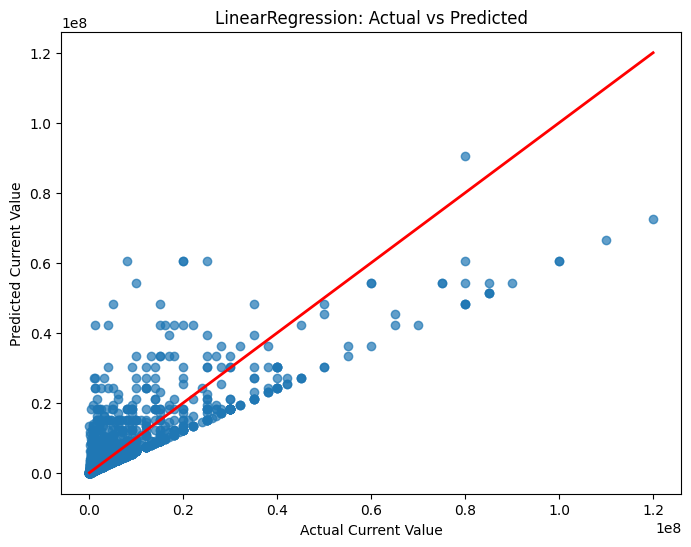

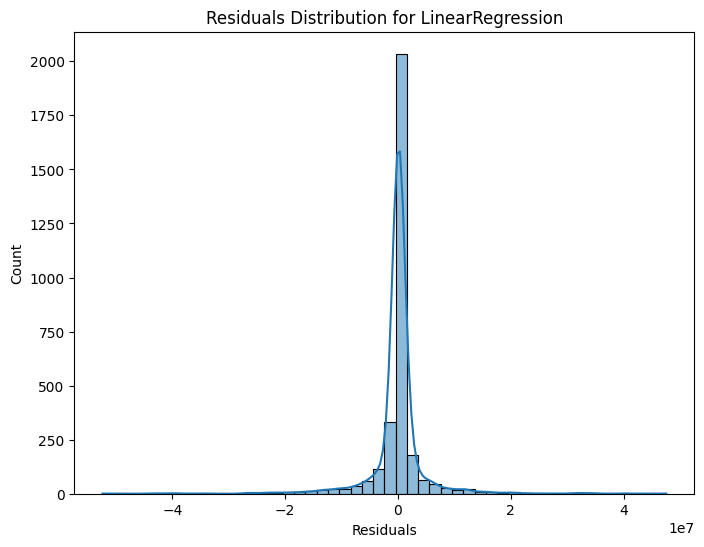


Processing Ridge
Using best threshold: 0.45
Best hyperparameter for Ridge: 10
Average Metrics (via cross validation):
  MSE Train: 2.66e+13
  MSE Test: 2.72e+13
  MAE Train: 2.10e+06
  MAE Test: 2.10e+06
  R2 Train: 0.712
  R2 Test: 0.699


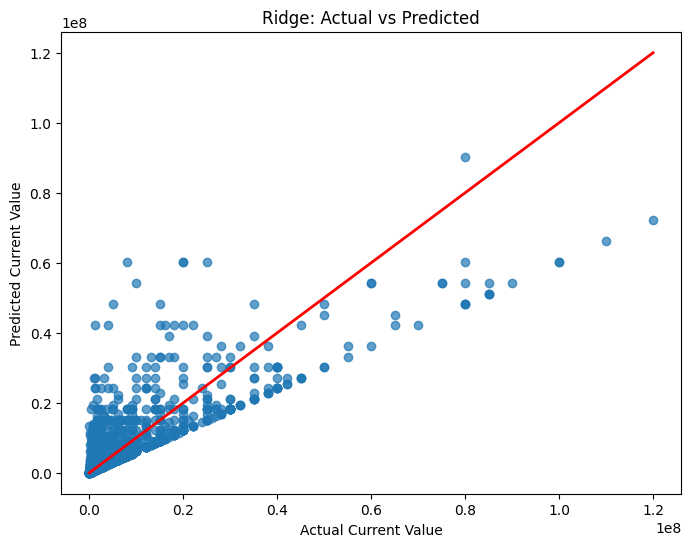

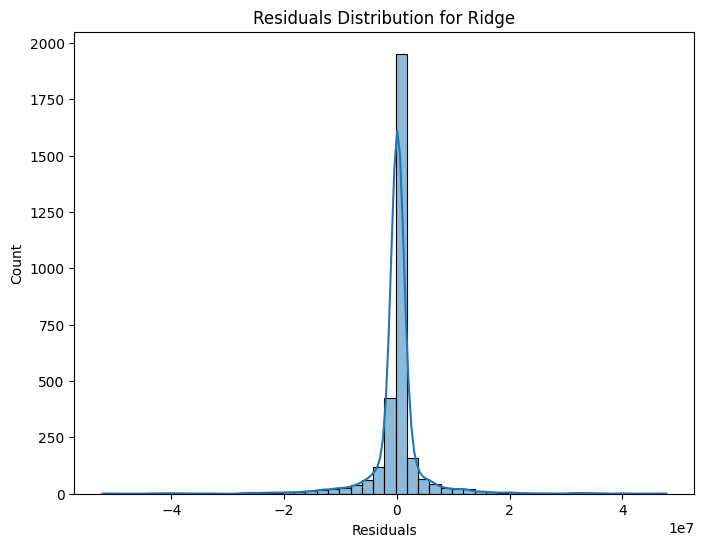


Processing Lasso
Using best threshold: 0.45
Best hyperparameter for Lasso: 0.001
Average Metrics (via cross validation):
  MSE Train: 2.66e+13
  MSE Test: 2.72e+13
  MAE Train: 2.10e+06
  MAE Test: 2.10e+06
  R2 Train: 0.712
  R2 Test: 0.699


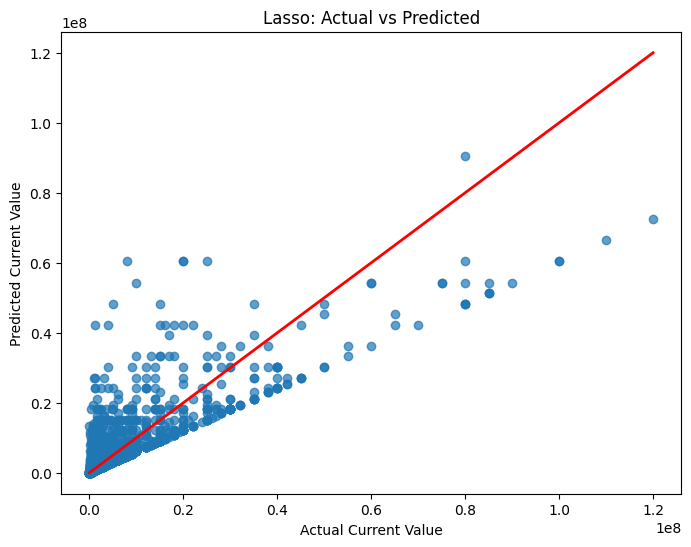

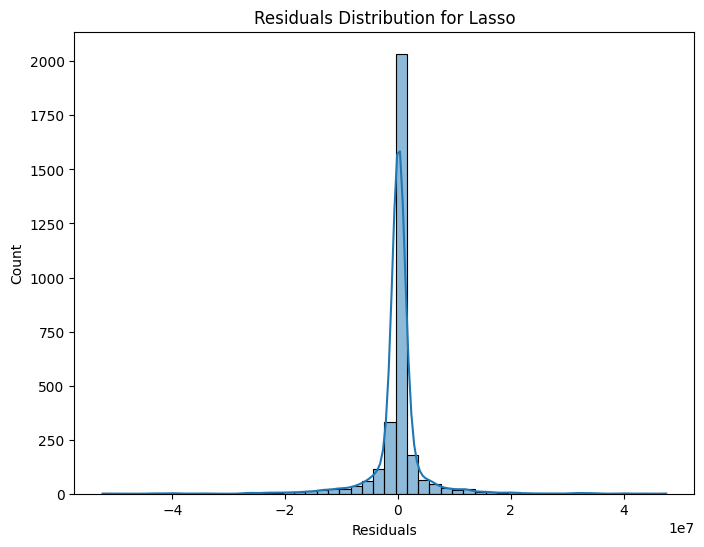

In [87]:
# Expanded hyperparameter grids for Ridge and Lasso (even larger ranges)
ridge_param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_param_grid = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

cv = KFold(n_splits=5, shuffle=True, random_state=random_state)

final_results = {}

for model_name in ['LinearRegression', 'Ridge', 'Lasso']:
    print(f"\n{'='*20}\nProcessing {model_name}\n{'='*20}")
    best_threshold = best_thresh[model_name]
    print("Using best threshold:", best_threshold)
    
    # Select features based on best threshold
    selected_features = correlation[abs(correlation['current_value']) > best_threshold]['current_value'].index
    if 'current_value' not in selected_features:
        selected_features = selected_features.union(['current_value'])
    df_selected = df_midfielders[selected_features].copy()
    
    X_full = df_selected.drop(columns=['current_value'])
    y_full = df_selected['current_value']
    
    # Build and train the model
    if model_name == 'LinearRegression':
        pipeline_model = make_pipeline(StandardScaler(), LinearRegression())
        # No hyperparameter tuning for LinearRegression
        best_model = pipeline_model.fit(X_full, y_full)
    elif model_name == 'Ridge':
        pipeline_model = make_pipeline(StandardScaler(), Ridge())
        grid_search = GridSearchCV(pipeline_model, param_grid=ridge_param_grid,
                                   cv=cv, scoring='neg_mean_squared_error', refit=True)
        grid_search.fit(X_full, y_full)
        best_model = grid_search.best_estimator_
        print("Best hyperparameter for Ridge:", grid_search.best_params_['ridge__alpha'])
    elif model_name == 'Lasso':
        pipeline_model = make_pipeline(StandardScaler(), Lasso(max_iter=10000))
        grid_search = GridSearchCV(pipeline_model, param_grid=lasso_param_grid,
                                   cv=cv, scoring='neg_mean_squared_error', refit=True)
        grid_search.fit(X_full, y_full)
        best_model = grid_search.best_estimator_
        print("Best hyperparameter for Lasso:", grid_search.best_params_['lasso__alpha'])
    
    # Evaluate metrics using cross validation on the full data with the best model
    cv_results = cross_validate(best_model, X_full, y_full, cv=cv, scoring=scoring, return_train_score=True)
    avg_metrics = {
        'MSE_train': -np.mean(cv_results['train_MSE']),
        'MSE_test': -np.mean(cv_results['test_MSE']),
        'MAE_train': -np.mean(cv_results['train_MAE']),
        'MAE_test': -np.mean(cv_results['test_MAE']),
        'R2_train': np.mean(cv_results['train_R2']),
        'R2_test': np.mean(cv_results['test_R2']),
    }
    print("Average Metrics (via cross validation):")
    print("  MSE Train: {:.2e}".format(avg_metrics['MSE_train']))
    print("  MSE Test: {:.2e}".format(avg_metrics['MSE_test']))
    print("  MAE Train: {:.2e}".format(avg_metrics['MAE_train']))
    print("  MAE Test: {:.2e}".format(avg_metrics['MAE_test']))
    print("  R2 Train: {:.3f}".format(avg_metrics['R2_train']))
    print("  R2 Test: {:.3f}".format(avg_metrics['R2_test']))
    
    # Retrain the best model on full data and get predictions
    best_model.fit(X_full, y_full)
    predictions = best_model.predict(X_full)
    
    # Plot Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_full, predictions, alpha=0.7)
    plt.plot([y_full.min(), y_full.max()], [y_full.min(), y_full.max()], color='red', lw=2)
    plt.xlabel('Actual Current Value')
    plt.ylabel('Predicted Current Value')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.show()
    
    # Plot residual distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(y_full - predictions, bins=50, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'Residuals Distribution for {model_name}')
    plt.show()
    
    final_results[model_name] = {'best_model': best_model, 'avg_metrics': avg_metrics}


### Forward Model

In [88]:
df_forwards.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,position_label,winger_label
23,Manchester United,Marcus Rashford,Attack-LeftWinger,185.0,25.0,88,0.528790,0.196408,0.075541,0.000000,0.000000,5957,319,35,9,80000000,85000000,4,1,Forward,Winger
24,Manchester United,Jadon Sancho,Attack-LeftWinger,180.0,23.0,79,0.219780,0.109890,0.000000,0.000000,0.000000,4914,173,32,5,55000000,130000000,4,1,Forward,Winger
25,Manchester United,Anthony Elanga,Attack-LeftWinger,178.0,21.0,63,0.236220,0.206693,0.029528,0.000000,0.029528,3048,0,0,1,25000000,25000000,4,1,Forward,Winger
26,Manchester United,Alejandro Garnacho,Attack-LeftWinger,180.0,18.0,72,0.525730,0.300417,0.225313,0.025035,0.000000,3595,50,11,2,25000000,25000000,4,1,Forward,Winger
27,Manchester United,Antony,Attack-RightWinger,172.0,23.0,80,0.335252,0.228581,0.182865,0.015239,0.000000,5906,196,22,5,70000000,75000000,4,1,Forward,Winger


In [89]:
df_forwards.shape

(2897, 21)

In [90]:
# Delete the names since they are irrelevant to the predictive process
df_forwards.drop(columns='name', inplace = True)
# Drop the 'position_encoded' and 'winger' columns since we created two with the same meaning and they will be one hot encoded
df_forwards.drop(columns= ['position_encoded', 'winger'], inplace = True)
df_forwards.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_label          object
winger_label            object
dtype: object

In [91]:
categorical_columns = ['team', 'position', 'position_label', 'winger_label']

numerical_columns = ['height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value']

In [92]:
df_forwards = pd.get_dummies(df_forwards, columns=categorical_columns)

In [93]:
df_forwards.shape

(2897, 396)

In [94]:
# Compute and display correlation with 'current_value'
correlation = df_forwards.corr()
print("Top correlations with current_value:")
print(correlation['current_value'].sort_values(ascending=False).head())

# # Plot the correlation heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_goalkeepers.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Feature Correlation Matrix")
# plt.show()

# Define a grid of thresholds to test for feature selection
thresholds = [0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.25, 0.27, 0.3, 0.32, 0.35, 0.37, 0.4, 0.42, 0.45, 0.47, 0.5, 0.53, 0.55, 0.57, 0.6, 0.63, 0.65, 0.67, 0.7]

Top correlations with current_value:
current_value     1.000000
highest_value     0.821161
minutes played    0.441602
appearance        0.398610
award             0.329631
Name: current_value, dtype: float64


In [95]:
# Define scoring metrics for cross validation
scoring = {
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

def evaluate_models_for_threshold(threshold):
    """
    For a given correlation threshold, select features from df_goalkeepers,
    then evaluate three models (Linear, Ridge, Lasso) using 5-fold cross validation.
    Ridge and Lasso include an inner grid search over alpha with an extended grid.
    Returns a dictionary with average train and test metrics.
    """
    # Select features based on the threshold (using absolute correlation)
    selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
    # Ensure that the target is included
    if 'current_value' not in selected_features:
        selected_features = selected_features.union(['current_value'])
    df_selected = df_forwards[selected_features].copy()
    
    # Prepare X and y
    X = df_selected.drop(columns=['current_value'])
    y = df_selected['current_value']
    
    cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
    results = {}
    
    # Linear Regression
    pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
    cv_results_lr = cross_validate(pipe_lr, X, y, cv=cv, scoring=scoring, return_train_score=True)
    results['LinearRegression'] = {
        'MSE_train': -np.mean(cv_results_lr['train_MSE']),
        'MSE_test': -np.mean(cv_results_lr['test_MSE']),
        'MAE_train': -np.mean(cv_results_lr['train_MAE']),
        'MAE_test': -np.mean(cv_results_lr['test_MAE']),
        'R2_train': np.mean(cv_results_lr['train_R2']),
        'R2_test': np.mean(cv_results_lr['test_R2'])
    }
    
    # Ridge Regression with expanded grid for alpha
    pipe_ridge = make_pipeline(StandardScaler(), Ridge())
    param_grid_ridge = {'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
    grid_ridge = GridSearchCV(pipe_ridge, param_grid=param_grid_ridge,
                              cv=cv, scoring='neg_mean_squared_error', refit=True)
    grid_ridge.fit(X, y)
    best_ridge = grid_ridge.best_estimator_
    cv_results_ridge = cross_validate(best_ridge, X, y, cv=cv, scoring=scoring, return_train_score=True)
    results['Ridge'] = {
        'best_alpha': grid_ridge.best_params_['ridge__alpha'],
        'MSE_train': -np.mean(cv_results_ridge['train_MSE']),
        'MSE_test': -np.mean(cv_results_ridge['test_MSE']),
        'MAE_train': -np.mean(cv_results_ridge['train_MAE']),
        'MAE_test': -np.mean(cv_results_ridge['test_MAE']),
        'R2_train': np.mean(cv_results_ridge['train_R2']),
        'R2_test': np.mean(cv_results_ridge['test_R2'])
    }
    
    # Lasso Regression with expanded grid for alpha
    pipe_lasso = make_pipeline(StandardScaler(), Lasso(max_iter=10000))
    param_grid_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
    grid_lasso = GridSearchCV(pipe_lasso, param_grid=param_grid_lasso,
                              cv=cv, scoring='neg_mean_squared_error', refit=True)
    grid_lasso.fit(X, y)
    best_lasso = grid_lasso.best_estimator_
    cv_results_lasso = cross_validate(best_lasso, X, y, cv=cv, scoring=scoring, return_train_score=True)
    results['Lasso'] = {
        'best_alpha': grid_lasso.best_params_['lasso__alpha'],
        'MSE_train': -np.mean(cv_results_lasso['train_MSE']),
        'MSE_test': -np.mean(cv_results_lasso['test_MSE']),
        'MAE_train': -np.mean(cv_results_lasso['train_MAE']),
        'MAE_test': -np.mean(cv_results_lasso['test_MAE']),
        'R2_train': np.mean(cv_results_lasso['train_R2']),
        'R2_test': np.mean(cv_results_lasso['test_R2'])
    }
    
    # Also record the number of features used
    results['num_features'] = X.shape[1]
    
    return results


In [96]:
grid_search_results = {}

for thresh in thresholds:
    print(f"Evaluating threshold: {thresh}")
    results = evaluate_models_for_threshold(thresh)
    grid_search_results[thresh] = results
    print(f"  Number of features selected: {results['num_features']}")
    print("  Linear Regression Test MAE: {:.2e}".format(results['LinearRegression']['MAE_test']))
    print("  Ridge Test MAE: {:.2e} (best alpha: {})".format(results['Ridge']['MAE_test'],
                                                              results['Ridge']['best_alpha']))
    print("  Lasso Test MAE: {:.2e} (best alpha: {})".format(results['Lasso']['MAE_test'],
                                                              results['Lasso']['best_alpha']))
    print("-" * 40)

# Identify the best threshold for each model based on lowest test MAE
best_thresh = {}
for model in ['LinearRegression', 'Ridge', 'Lasso']:
    best_val = np.inf
    best_t = None
    for thresh, res in grid_search_results.items():
        mae = res[model]['MAE_test']
        if mae < best_val:
            best_val = mae
            best_t = thresh
    best_thresh[model] = best_t
    print(f"Best threshold for {model}: {best_t} with Test MAE: {best_val:.2e}")


Evaluating threshold: 0.1
  Number of features selected: 20
  Linear Regression Test MAE: 2.65e+06
  Ridge Test MAE: 2.64e+06 (best alpha: 10)
  Lasso Test MAE: 2.64e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.12
  Number of features selected: 19
  Linear Regression Test MAE: 2.66e+06
  Ridge Test MAE: 2.65e+06 (best alpha: 10)
  Lasso Test MAE: 2.65e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.14
  Number of features selected: 16
  Linear Regression Test MAE: 2.65e+06
  Ridge Test MAE: 2.64e+06 (best alpha: 10)
  Lasso Test MAE: 2.64e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.16
  Number of features selected: 11
  Linear Regression Test MAE: 2.61e+06
  Ridge Test MAE: 2.61e+06 (best alpha: 0.01)
  Lasso Test MAE: 2.60e+06 (best alpha: 10000)
----------------------------------------
Evaluating threshold: 0.18
  Number of features selected: 9
  Linear Re


Processing LinearRegression
Using best threshold: 0.45
Average Metrics (via cross validation):
  MSE Train: 4.06e+13
  MSE Test: 4.27e+13
  MAE Train: 2.40e+06
  MAE Test: 2.42e+06
  R2 Train: 0.675
  R2 Test: 0.638


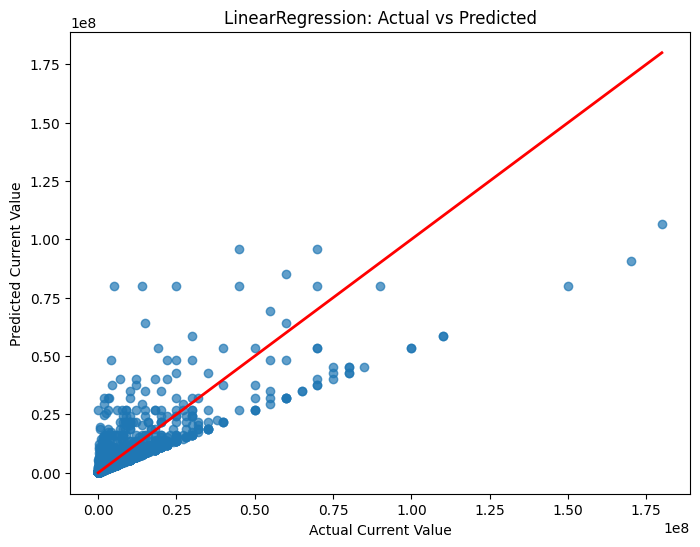

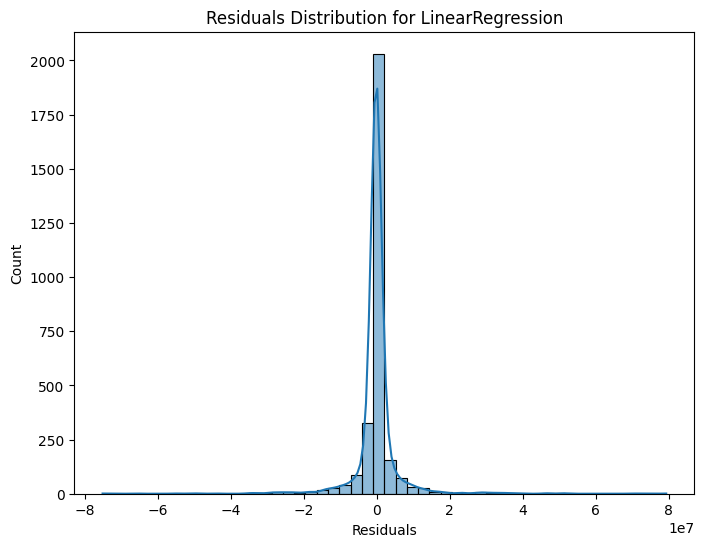


Processing Ridge
Using best threshold: 0.45
Best hyperparameter for Ridge: 10
Average Metrics (via cross validation):
  MSE Train: 4.06e+13
  MSE Test: 4.27e+13
  MAE Train: 2.40e+06
  MAE Test: 2.42e+06
  R2 Train: 0.675
  R2 Test: 0.639


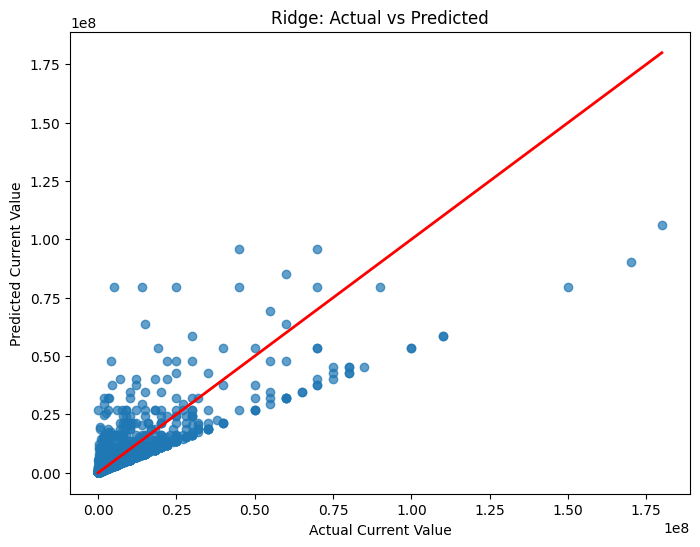

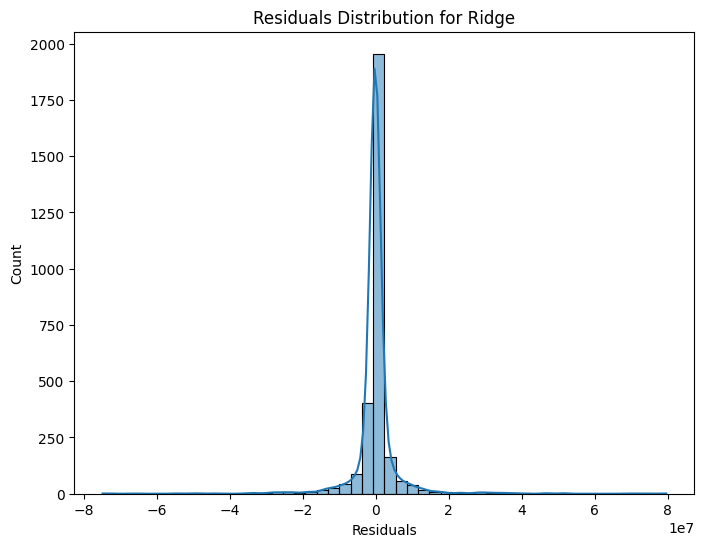


Processing Lasso
Using best threshold: 0.45
Best hyperparameter for Lasso: 0.001
Average Metrics (via cross validation):
  MSE Train: 4.06e+13
  MSE Test: 4.27e+13
  MAE Train: 2.40e+06
  MAE Test: 2.42e+06
  R2 Train: 0.675
  R2 Test: 0.638


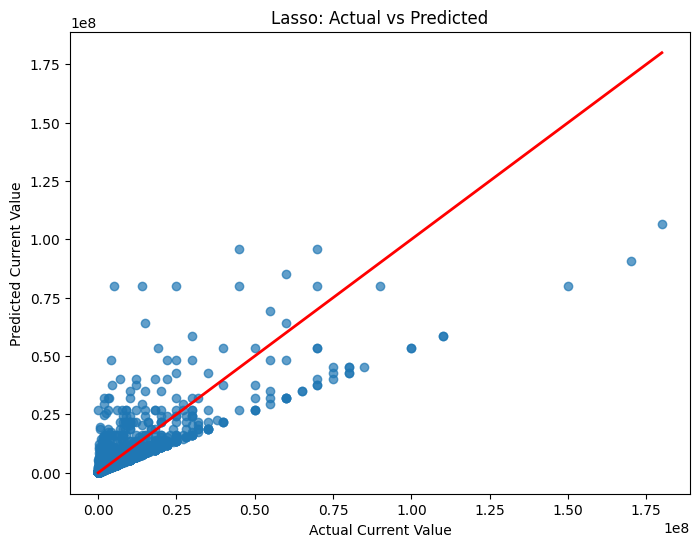

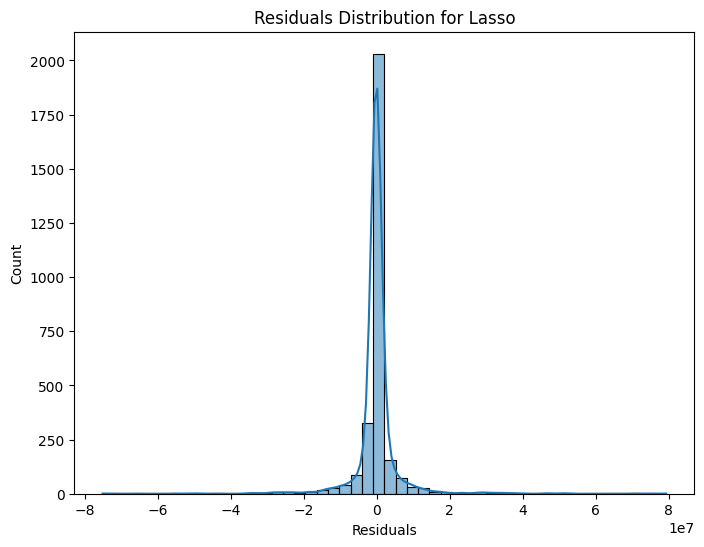

In [97]:
# Expanded hyperparameter grids for Ridge and Lasso (even larger ranges)
ridge_param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_param_grid = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

cv = KFold(n_splits=5, shuffle=True, random_state=random_state)

final_results = {}

for model_name in ['LinearRegression', 'Ridge', 'Lasso']:
    print(f"\n{'='*20}\nProcessing {model_name}\n{'='*20}")
    best_threshold = best_thresh[model_name]
    print("Using best threshold:", best_threshold)
    
    # Select features based on best threshold
    selected_features = correlation[abs(correlation['current_value']) > best_threshold]['current_value'].index
    if 'current_value' not in selected_features:
        selected_features = selected_features.union(['current_value'])
    df_selected = df_forwards[selected_features].copy()
    
    X_full = df_selected.drop(columns=['current_value'])
    y_full = df_selected['current_value']
    
    # Build and train the model
    if model_name == 'LinearRegression':
        pipeline_model = make_pipeline(StandardScaler(), LinearRegression())
        # No hyperparameter tuning for LinearRegression
        best_model = pipeline_model.fit(X_full, y_full)
    elif model_name == 'Ridge':
        pipeline_model = make_pipeline(StandardScaler(), Ridge())
        grid_search = GridSearchCV(pipeline_model, param_grid=ridge_param_grid,
                                   cv=cv, scoring='neg_mean_squared_error', refit=True)
        grid_search.fit(X_full, y_full)
        best_model = grid_search.best_estimator_
        print("Best hyperparameter for Ridge:", grid_search.best_params_['ridge__alpha'])
    elif model_name == 'Lasso':
        pipeline_model = make_pipeline(StandardScaler(), Lasso(max_iter=10000))
        grid_search = GridSearchCV(pipeline_model, param_grid=lasso_param_grid,
                                   cv=cv, scoring='neg_mean_squared_error', refit=True)
        grid_search.fit(X_full, y_full)
        best_model = grid_search.best_estimator_
        print("Best hyperparameter for Lasso:", grid_search.best_params_['lasso__alpha'])
    
    # Evaluate metrics using cross validation on the full data with the best model
    cv_results = cross_validate(best_model, X_full, y_full, cv=cv, scoring=scoring, return_train_score=True)
    avg_metrics = {
        'MSE_train': -np.mean(cv_results['train_MSE']),
        'MSE_test': -np.mean(cv_results['test_MSE']),
        'MAE_train': -np.mean(cv_results['train_MAE']),
        'MAE_test': -np.mean(cv_results['test_MAE']),
        'R2_train': np.mean(cv_results['train_R2']),
        'R2_test': np.mean(cv_results['test_R2']),
    }
    print("Average Metrics (via cross validation):")
    print("  MSE Train: {:.2e}".format(avg_metrics['MSE_train']))
    print("  MSE Test: {:.2e}".format(avg_metrics['MSE_test']))
    print("  MAE Train: {:.2e}".format(avg_metrics['MAE_train']))
    print("  MAE Test: {:.2e}".format(avg_metrics['MAE_test']))
    print("  R2 Train: {:.3f}".format(avg_metrics['R2_train']))
    print("  R2 Test: {:.3f}".format(avg_metrics['R2_test']))
    
    # Retrain the best model on full data and get predictions
    best_model.fit(X_full, y_full)
    predictions = best_model.predict(X_full)
    
    # Plot Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_full, predictions, alpha=0.7)
    plt.plot([y_full.min(), y_full.max()], [y_full.min(), y_full.max()], color='red', lw=2)
    plt.xlabel('Actual Current Value')
    plt.ylabel('Predicted Current Value')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.show()
    
    # Plot residual distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(y_full - predictions, bins=50, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'Residuals Distribution for {model_name}')
    plt.show()
    
    final_results[model_name] = {'best_model': best_model, 'avg_metrics': avg_metrics}


## Classification Models:

### Logistic Regression

In [125]:
df.drop('name', inplace= True, axis = 1)
df.info()

KeyError: "['name'] not found in axis"

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# For reproducibility
random_state = 23


In [127]:
df_model = df.drop(columns=['position', 'position_encoded', 'winger_label'])

# Define the target and features.
# Use "position_label" as the target.
y = df_model['position_label']
X = df_model.drop(columns=['position_label'])

# Identify categorical and numerical columns.
# Here, we'll one-hot encode "team" (you can add more if needed).
# All other columns (e.g., height, age, etc.) are treated as numerical.
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Create a ColumnTransformer for preprocessing.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=random_state)


Numeric features: ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'highest_value', 'winger']
Categorical features: ['team']


In [128]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=random_state))
])

# Set up a grid for hyperparameter tuning.
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Use GridSearchCV for tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, refit=True)
grid_search.fit(X_train, y_train)

print("Best parameter C:", grid_search.best_params_['classifier__C'])
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Pytho

Best parameter C: 0.1
Best cross-validation accuracy: 0.772


Test Accuracy: 0.766
Test Precision (macro): 0.800
Test Recall (macro): 0.783


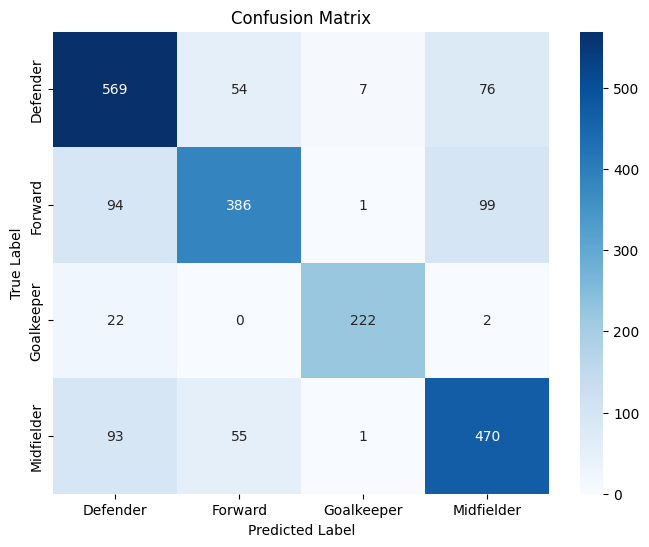

In [129]:
y_pred = grid_search.predict(X_test)

# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred)
# For multi-class, we compute macro-average precision and recall.
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print("Test Accuracy: {:.3f}".format(acc))
print("Test Precision (macro): {:.3f}".format(prec))
print("Test Recall (macro): {:.3f}".format(rec))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Decision Trees & Random Forests

In [130]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline
random_state = 23

In [131]:
df_model = df.drop(columns=['position', 'position_encoded', 'winger_label'])

# Define the target and features.
# Use "position_label" as the target.
y = df_model['position_label']
X = df_model.drop(columns=['position_label'])

# Identify categorical and numerical columns.
# Here, we'll one-hot encode "team" (you can add more if needed).
# All other columns (e.g., height, age, etc.) are treated as numerical.
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Create a ColumnTransformer for preprocessing.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=random_state)


Numeric features: ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'highest_value', 'winger']
Categorical features: ['team']


In [132]:
# Pipeline with Decision Tree
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=random_state))
])

# Set up a grid for hyperparameter tuning for Decision Tree.
param_grid_dt = {
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

# Use GridSearchCV for tuning the Decision Tree
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, refit=True)
grid_search_dt.fit(X_train, y_train)

print("Decision Tree best parameters:", grid_search_dt.best_params_)
print("Decision Tree best cross-validation accuracy: {:.3f}".format(grid_search_dt.best_score_))

Decision Tree best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_split': 5}
Decision Tree best cross-validation accuracy: 0.757


Decision Tree Test Accuracy: 0.746
Decision Tree Test Precision (macro): 0.775
Decision Tree Test Recall (macro): 0.775


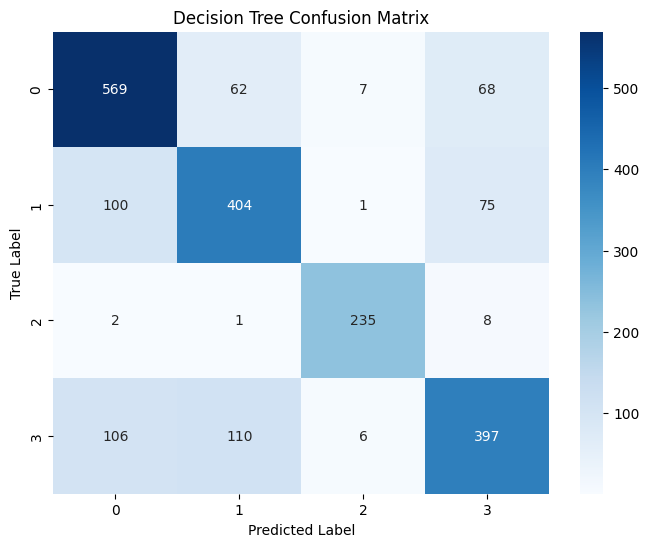

In [133]:
y_pred_dt = grid_search_dt.predict(X_test)

# Calculate evaluation metrics for Decision Tree
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='macro')
rec_dt = recall_score(y_test, y_pred_dt, average='macro')
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Test Accuracy: {:.3f}".format(acc_dt))
print("Decision Tree Test Precision (macro): {:.3f}".format(prec_dt))
print("Decision Tree Test Recall (macro): {:.3f}".format(rec_dt))

# Plot the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [147]:
# Fix n_estimators to a reasonable default and focus on key parameters.
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=random_state))
])

# Reduced hyperparameter grid focusing on overfitting control.
param_grid_rf = {
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__max_features': ['sqrt', 'log2']
}

# Use GridSearchCV for tuning the Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, refit=True)
grid_search_rf.fit(X_train, y_train)

print("Random Forest best parameters:", grid_search_rf.best_params_)
print("Random Forest best cross-validation accuracy: {:.3f}".format(grid_search_rf.best_score_))

Random Forest best parameters: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 10}
Random Forest best cross-validation accuracy: 0.782


Random Forest Test Accuracy: 0.771
Random Forest Test Precision (macro): 0.793
Random Forest Test Recall (macro): 0.800


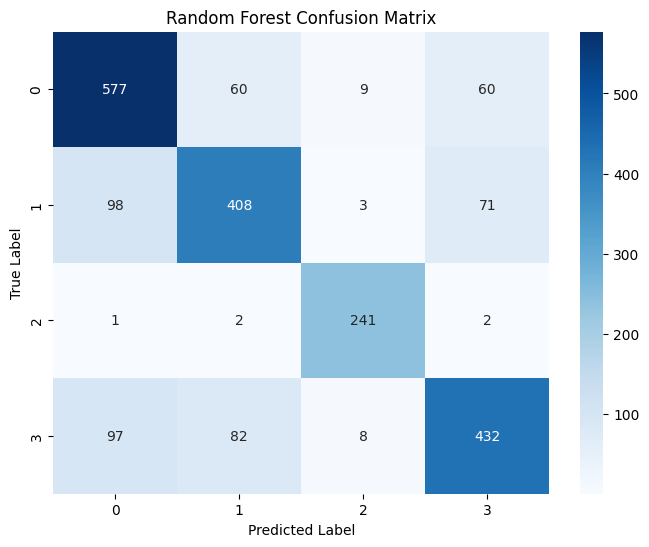

In [148]:
y_pred_rf = grid_search_rf.predict(X_test)

# Calculate evaluation metrics for Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='macro')
rec_rf = recall_score(y_test, y_pred_rf, average='macro')
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Test Accuracy: {:.3f}".format(acc_rf))
print("Random Forest Test Precision (macro): {:.3f}".format(prec_rf))
print("Random Forest Test Recall (macro): {:.3f}".format(rec_rf))

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [153]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
best_estimator = grid_search_rf.best_estimator_
best_preprocessor = best_estimator.named_steps['preprocessor']
best_rf = best_estimator.named_steps['classifier']
y_pred_train_cv = cross_val_predict(grid_search_rf.best_estimator_, X_train, y_train, cv=5)
print("Cross-validated train classification report:")
print(classification_report(y_train, y_pred_train_cv, labels=list(best_rf.classes_)))


Cross-validated train classification report:
              precision    recall  f1-score   support

    Defender       0.76      0.83      0.79      2822
     Forward       0.76      0.73      0.75      2322
  Goalkeeper       0.95      0.98      0.97       983
  Midfielder       0.76      0.69      0.72      2476

    accuracy                           0.78      8603
   macro avg       0.81      0.81      0.81      8603
weighted avg       0.78      0.78      0.78      8603



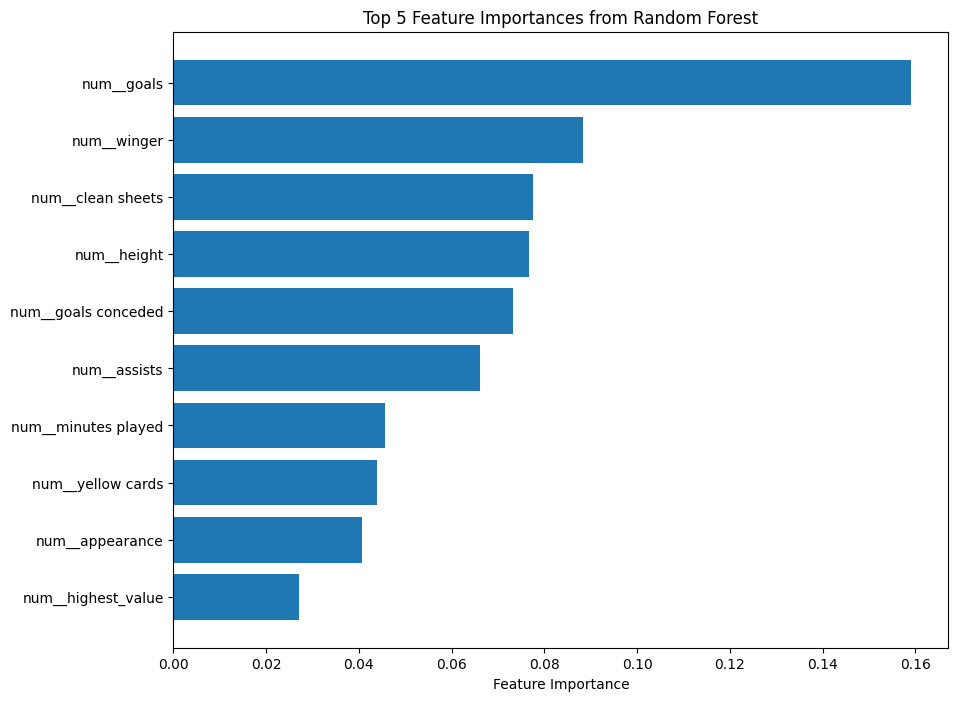

In [149]:
# Extract the best estimator's preprocessor and classifier
best_estimator = grid_search_rf.best_estimator_
best_preprocessor = best_estimator.named_steps['preprocessor']
best_rf = best_estimator.named_steps['classifier']

# Obtain the feature names after transformation.
feature_names = best_preprocessor.get_feature_names_out()

# Get the feature importances from the fitted Random Forest model.
feature_importances = best_rf.feature_importances_

# Convert feature names to a numpy array (if not already) for indexing.
feature_names = np.array(feature_names)

# Sort the indices in descending order based on feature importances.
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 5 features.
top_n = 10
top_indices = sorted_indices[:top_n]
top_feature_names = feature_names[top_indices]
top_feature_importances = feature_importances[top_indices]

# Plot the top 5 feature importances.
plt.figure(figsize=(10, 8))
plt.barh(top_feature_names, top_feature_importances)
plt.xlabel('Feature Importance')
plt.title('Top 5 Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Optional: Invert y-axis to show the highest importance at the top.
plt.show()
